In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import trompy as tp
import csv
from datetime import datetime, timedelta
from matplotlib.lines import Line2D


# the next two lines will expand the printed tables
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000


ctl_color= "gray"
exp_color="deepskyblue"

high_protein_color = (0.749, 0.8, 0.8)
low_protein_color = (0.247, 0.961, 0.949)
# the last element of the tuple is the alpha value
high_protein_color_alpha = (0.749, 0.8, 0.8, 0.1)
low_protein_color_alpha = (0.247, 0.961, 0.949, 0.1)



fig_folder=r"../plots\\"
READ_METAFILE= pd.read_excel(r"../FEDXD_METAFILE.xls" ,sheet_name="METAFILE" )

READ_METAFILE


,MOUSEID,SEX,BATCH,FEDFILE,CHOICE_SESSION,FED_PELLET,MODE,DIET
0,FEDXDF1,F,1,FED001_032923_02.CSV,0,MIX,FF,PR
1,FEDXDF1,F,1,FED001_033023_01.CSV,0,MIX,FR,PR
2,FEDXDF1,F,1,FED001_040923_00.CSV,1,CAS20,FR,PR
3,FEDXDF1,F,1,FED002_040923_00.CSV,1,CAS5,FR,PR
4,FEDXDF1,F,1,FED001_041323_00.CSV,2,CAS20,FR,PR
5,FEDXDF1,F,1,FED002_041323_00.CSV,2,SUC,FR,PR
6,FEDXDF1,F,1,FED001_041723_00.CSV,3,CAS5,FR,PR
7,FEDXDF1,F,1,FED002_041723_00.CSV,3,SUC,FR,PR
8,FEDXDF1,F,1,FED001_042123_03.CSV,4,CAS5,CE,PR
9,FEDXDF1,F,1,FED002_042123_02.CSV,4,SUC,CE,PR


In [3]:


# Load the data
file_path = r"..\results\MEGAMEAL_FREQUENCY.csv"  
data = pd.read_csv(file_path)

# Filter out choice session 0
data_filtered = data[data['CHOICE_SESSION'] != 0]

# Define the choices for each session
choice_sessions_adjusted = {
    1: ['CAS20', 'CAS5'],
    2: ['CAS20', 'SUC'],
    3: ['CAS5', 'SUC'],
    4: ['CAS5', 'SUC']
}

# Initialize an empty dataframe to store results
results = pd.DataFrame()

# Iterate over each choice session and calculate the ratios
for session, choices in choice_sessions_adjusted.items():
    # Filter data for the current session
    session_data = data_filtered[data_filtered['CHOICE_SESSION'] == session]
    
    # Pivot the data to get counts of each choice type
    pivot_data = session_data.pivot(index=['MOUSEID'], columns='PELLET_TYPE', values='COUNT')
    
    # Ensure both choices are present in the pivot table
    for choice in choices:
        if choice not in pivot_data.columns:
            pivot_data[choice] = 0
    
    # Calculate the ratio for the current session
    ratio_column_name = f'RATIO_SESSION_{session}'
    pivot_data[ratio_column_name] = pivot_data[choices[0]] / (pivot_data[choices[0]] + pivot_data[choices[1]])
    
    # Merge the calculated ratios back to the original data
    if results.empty:
        results = pivot_data[[ratio_column_name]]
    else:
        results = results.join(pivot_data[[ratio_column_name]])

# Reset the index to bring MOUSEID back as a column
results.reset_index(inplace=True)

# Merge the ratios with the original data
final_data = pd.merge(data, results, on='MOUSEID', how='left')

# Display the final data
final_data


,Unnamed: 0,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,COUNT,MEAL_SIZE,SNACK_SIZE,NUMBER_OF_MEALS,MEAL_FREQUENCY,NUMBER_OF_SNACKS,SNACK_FREQUENCY,NUMBER_OF_MEGA_MEALS,AVERAGE_MEGA_MEAL_SIZE,MEGA_MEAL_FREQUENCY,MEALS_HOUR_0,MEALS_HOUR_1,MEALS_HOUR_2,MEALS_HOUR_3,MEALS_HOUR_4,MEALS_HOUR_5,MEALS_HOUR_6,MEALS_HOUR_7,MEALS_HOUR_8,MEALS_HOUR_9,MEALS_HOUR_10,MEALS_HOUR_11,MEALS_HOUR_12,MEALS_HOUR_13,MEALS_HOUR_14,MEALS_HOUR_15,MEALS_HOUR_16,MEALS_HOUR_17,MEALS_HOUR_18,MEALS_HOUR_19,MEALS_HOUR_20,MEALS_HOUR_21,MEALS_HOUR_22,MEALS_HOUR_23,RATIO_SESSION_1,RATIO_SESSION_2,RATIO_SESSION_3,RATIO_SESSION_4
0,0,FEDXDF1,F,PR,0.0,MIX,210,4.666667,1.0,42,1.932688,14,0.644229,10,7.400000,0.460164,2.0,1.0,0.0,3.0,3.0,1.0,1.0,4.0,0.0,0.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,0.632768,0.984293,0.903670,0.666667
1,1,FEDXDF1,F,PR,0.0,MIX,296,3.271429,1.0,70,1.471112,67,1.408064,5,7.600000,0.105079,7.0,3.0,5.0,0.0,0.0,3.0,2.0,0.0,2.0,1.0,1.0,2.0,4.0,1.0,5.0,4.0,8.0,5.0,5.0,4.0,0.0,0.0,6.0,2.0,0.632768,0.984293,0.903670,0.666667
2,2,FEDXDF2,F,PR,0.0,MIX,350,3.387097,1.0,93,4.203179,35,1.581841,10,6.900000,0.451955,2.0,1.0,8.0,11.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,4.0,5.0,7.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,2.0,0.756410,0.700000,0.789809,0.620968
3,3,FEDXDF2,F,PR,0.0,MIX,330,3.011905,1.0,84,1.727763,77,1.583783,5,6.600000,0.102843,6.0,2.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,5.0,4.0,8.0,8.0,7.0,9.0,7.0,4.0,4.0,3.0,4.0,3.0,0.756410,0.700000,0.789809,0.620968
4,4,FEDXDF3,F,PR,0.0,MIX,291,3.652174,1.0,69,2.923626,39,1.652484,8,7.625000,0.338971,4.0,5.0,0.0,4.0,4.0,0.0,5.0,0.0,2.0,3.0,0.0,1.0,2.0,4.0,6.0,5.0,5.0,7.0,4.0,4.0,3.0,1.0,0.0,0.0,0.555000,0.678947,0.773585,0.567568
5,5,FEDXDF3,F,PR,0.0,MIX,375,4.144737,1.0,76,1.565764,60,1.236129,18,8.000000,0.370839,5.0,0.0,5.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,6.0,5.0,6.0,6.0,7.0,6.0,4.0,4.0,4.0,3.0,1.0,4.0,0.555000,0.678947,0.773585,0.567568
6,6,FEDXDF4,F,PR,0.0,MIX,294,4.257576,1.0,66,2.779630,13,0.547503,16,7.250000,0.673850,4.0,3.0,7.0,6.0,0.0,1.0,2.0,0.0,4.0,1.0,2.0,1.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,2.0,2.0,0.0,3.0,3.0,0.739130,0.748538,0.842105,0.650407
7,7,FEDXDF4,F,PR,0.0,MIX,312,4.928571,1.0,56,1.150724,36,0.739751,22,7.181818,0.452070,3.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,4.0,4.0,4.0,7.0,3.0,4.0,4.0,4.0,4.0,1.0,0.0,4.0,0.739130,0.748538,0.842105,0.650407
8,8,FEDXDF5,F,PR,0.0,MIX,227,5.538462,1.0,39,2.372744,11,0.669235,19,8.000000,1.155952,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,0.657534,0.626374,0.736842,0.533981
9,9,FEDXDF5,F,PR,0.0,MIX,363,4.920635,1.0,63,1.362612,53,1.146325,24,8.416667,0.519090,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,5.0,6.0,6.0,4.0,6.0,6.0,3.0,4.0,4.0,3.0,0.0,3.0,0.657534,0.626374,0.736842,0.533981


In [14]:
import pandas as pd

# Load the data
file_path = r"..\results\MEGAMEAL_FREQUENCY.csv"   # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Filter out choice session 0
data_filtered = data[data['CHOICE_SESSION'] != 0]

# Define the choices for each session
choice_sessions_adjusted = {
    1: ['CAS20', 'CAS5'],
    2: ['CAS20', 'SUC'],
    3: ['CAS5', 'SUC'],
    4: ['CAS5', 'SUC']
}

# Initialize a dictionary to store the ratios
ratios_dict = {}

# Iterate over each choice session and calculate the ratios
for session, choices in choice_sessions_adjusted.items():
    # Filter data for the current session
    session_data = data_filtered[data_filtered['CHOICE_SESSION'] == session]
    
    # Pivot the data to get counts of each choice type
    pivot_data = session_data.pivot(index=['MOUSEID'], columns='PELLET_TYPE', values='COUNT')
    
    # Ensure both choices are present in the pivot table
    for choice in choices:
        if choice not in pivot_data.columns:
            pivot_data[choice] = 0
    
    # Calculate the ratio for the current session
    ratio_column_name = f'RATIO_SESSION_{session}'
    pivot_data[ratio_column_name] = pivot_data[choices[0]] / (pivot_data[choices[0]] + pivot_data[choices[1]])
    
    # Store the ratios in the dictionary
    if session not in ratios_dict:
        ratios_dict[session] = pivot_data[ratio_column_name]
    else:
        ratios_dict[session] = ratios_dict[session].append(pivot_data[ratio_column_name])

# Create a new DataFrame for SEX, MOUSEID, and DIET
new_data = data[['SEX', 'MOUSEID', 'DIET']].drop_duplicates()

# Merge the ratios with the new DataFrame
for session, ratios in ratios_dict.items():
    new_data = new_data.merge(ratios.reset_index(), on='MOUSEID', how='left')

# Display the final data
new_data
new_data.to_csv(r"..\results\CHOICE_RATIOS.csv", index=False)

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

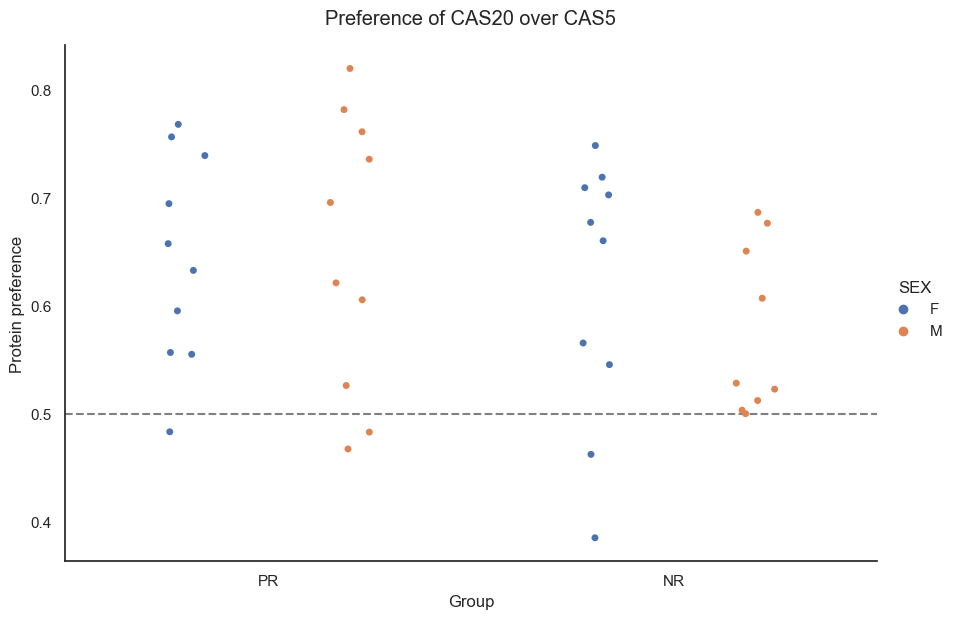

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

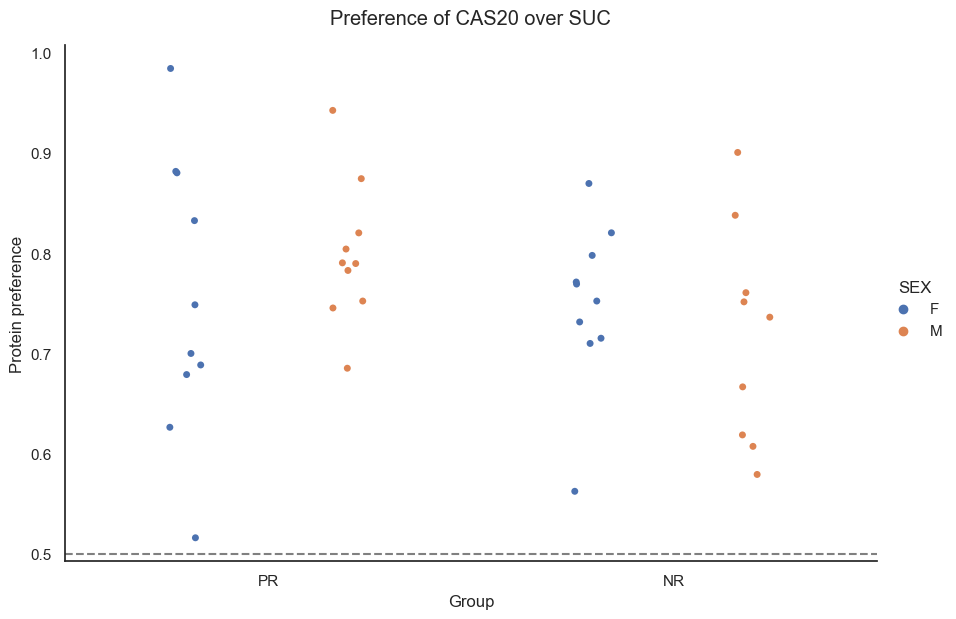

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

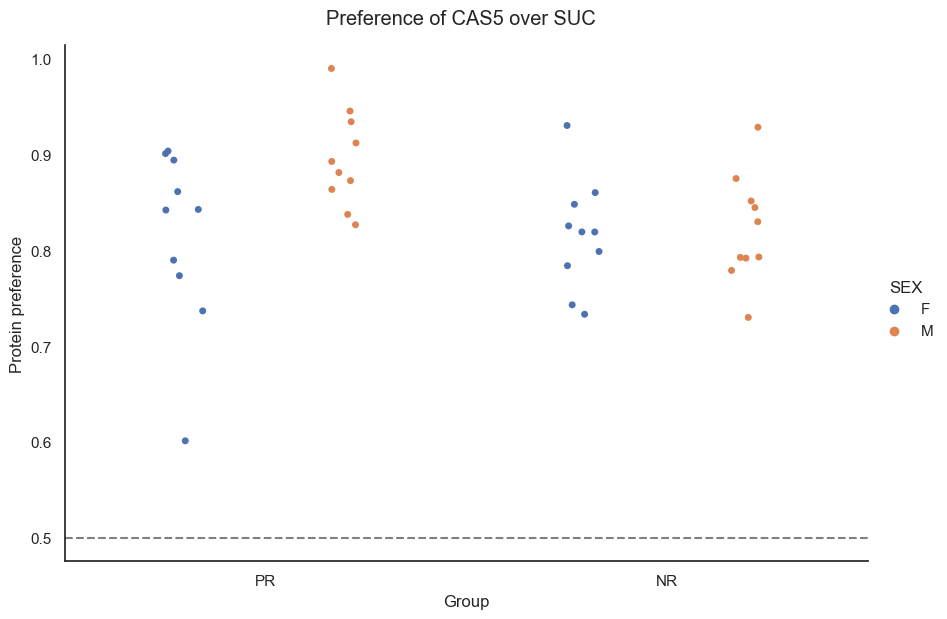

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

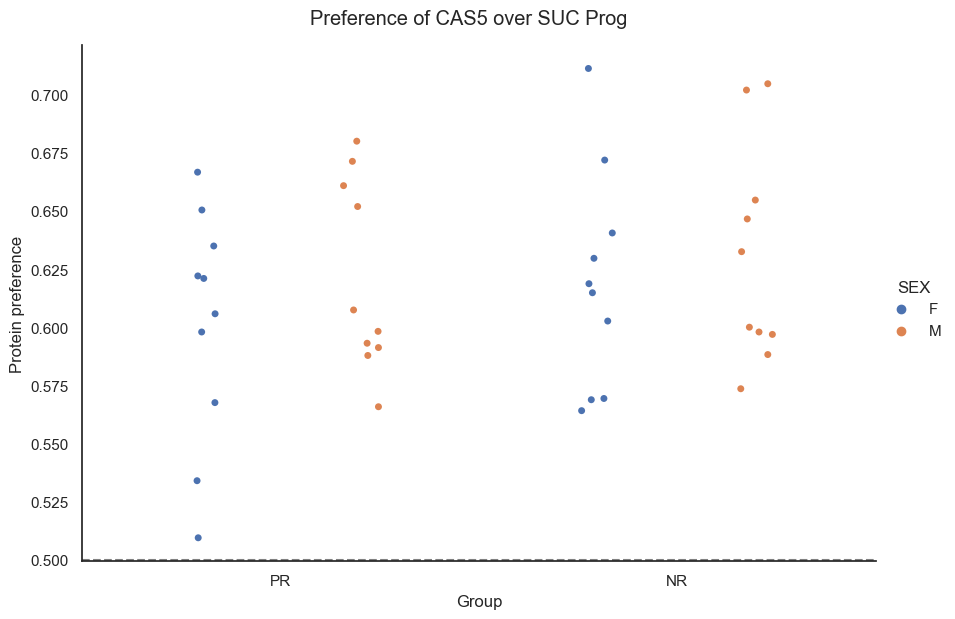

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Set the style to remove grid lines
sns.set(style="white")

# Plotting scatter plots from the newly created dataframe new_data
ratio_columns = [col for col in new_data.columns if 'CAS' in col]

for ratio_column in ratio_columns:
    plt.figure(figsize=(12, 6))
    g = sns.catplot(
        data=new_data, x='DIET', y=ratio_column, hue='SEX',
        kind='strip', dodge=True, height=6, aspect=1.5
    )
    for ax in g.axes.flat:
        ax.axhline(0.5, ls='--', color='grey')  # Reference line at y=0.5
    g.fig.suptitle(f'Preference of {ratio_column}', y=1.03),
    g.set_axis_labels('Group', 'Protein preference')
    plt.show()


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

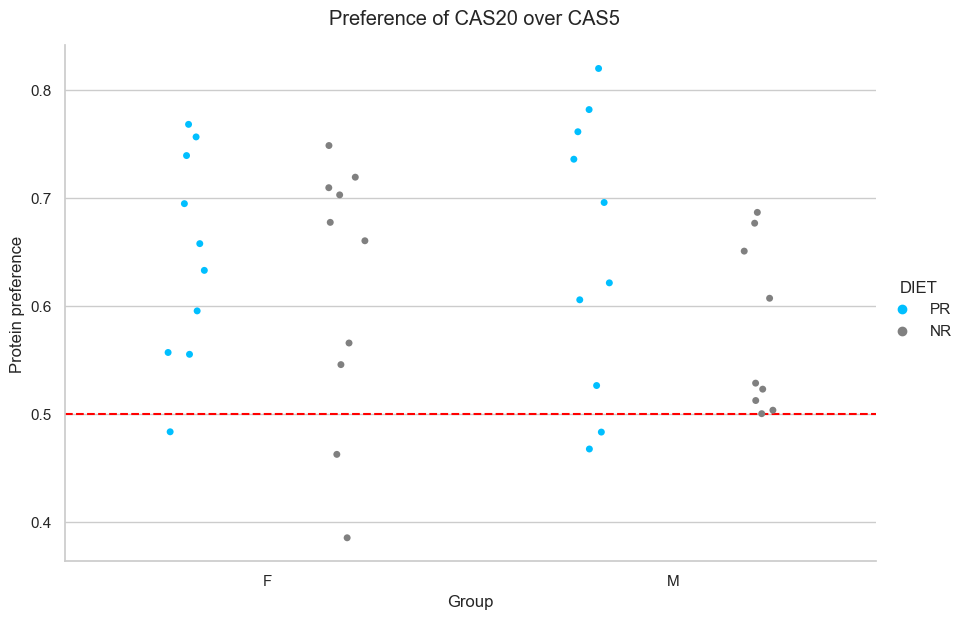

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

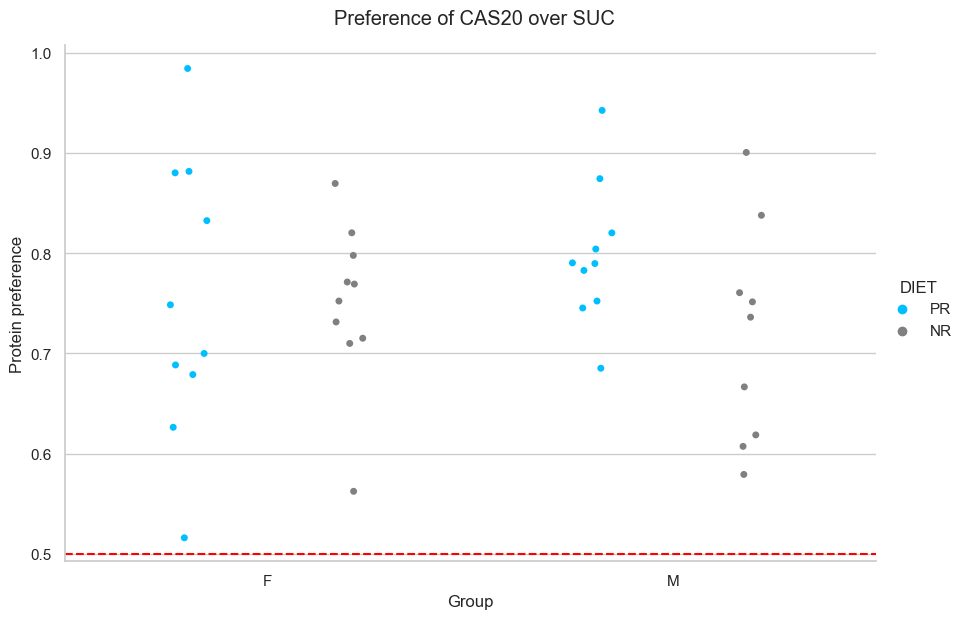

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

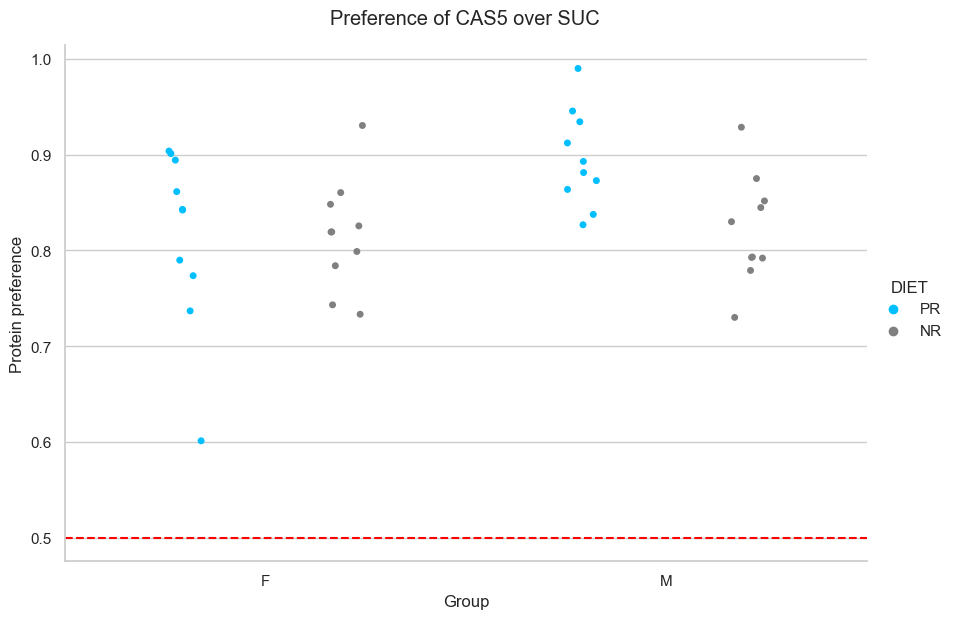

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

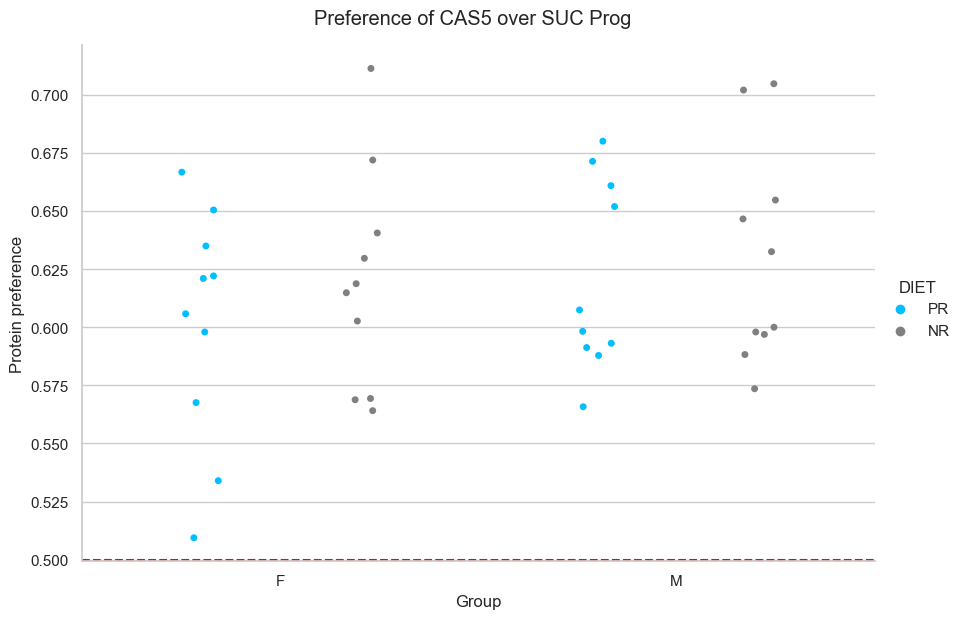

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

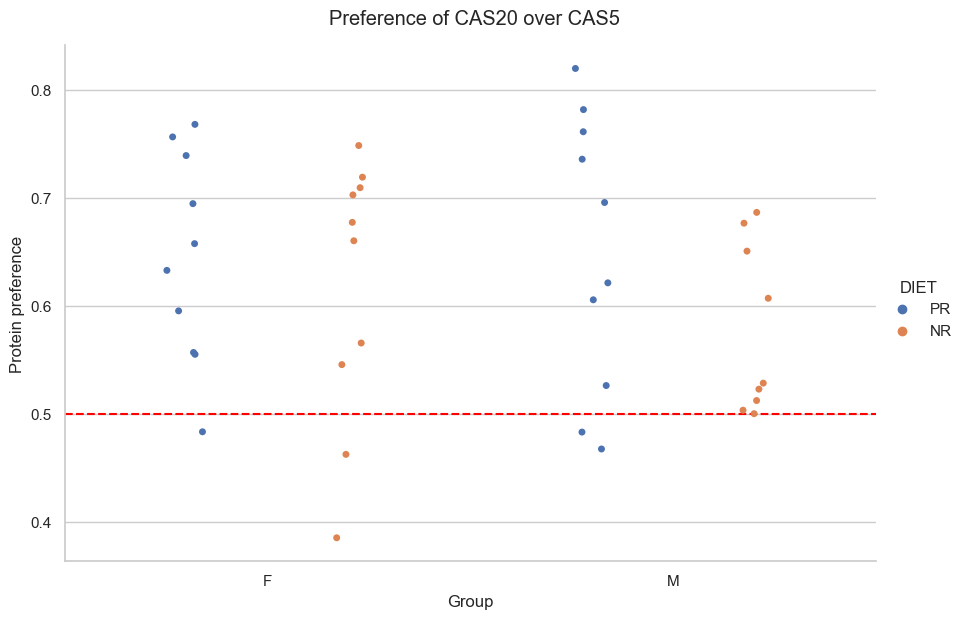

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

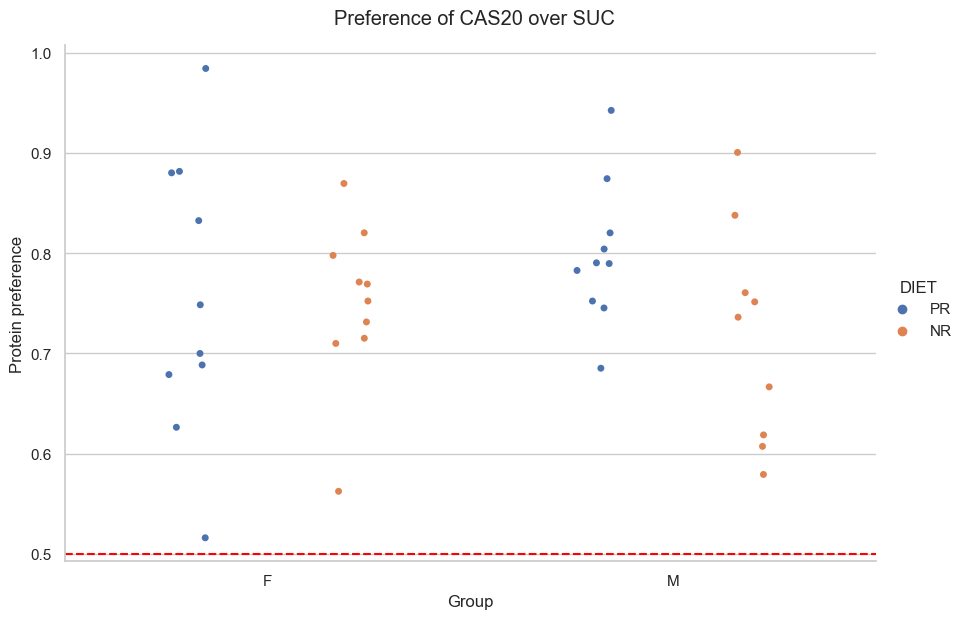

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

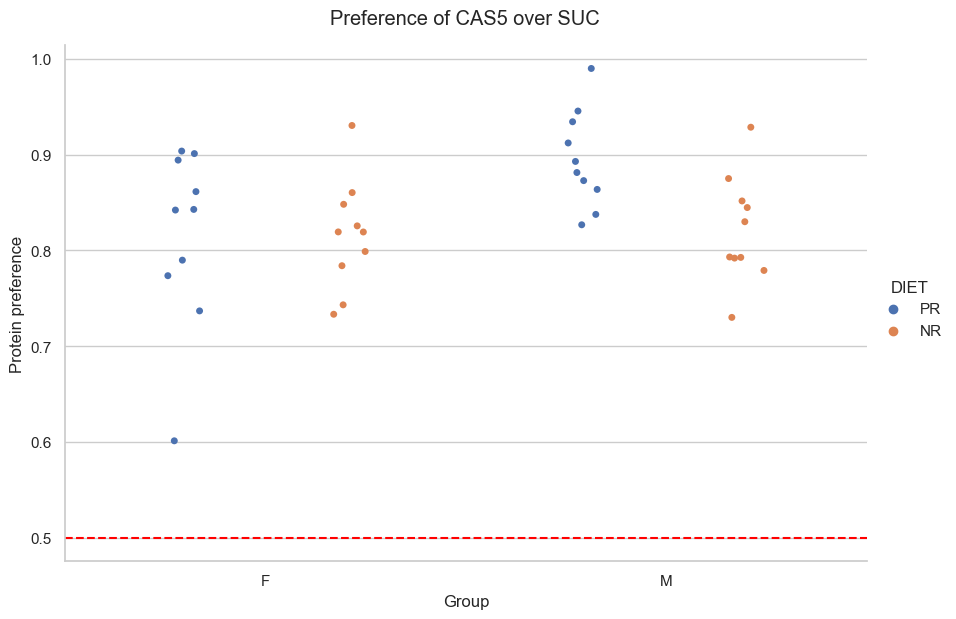

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

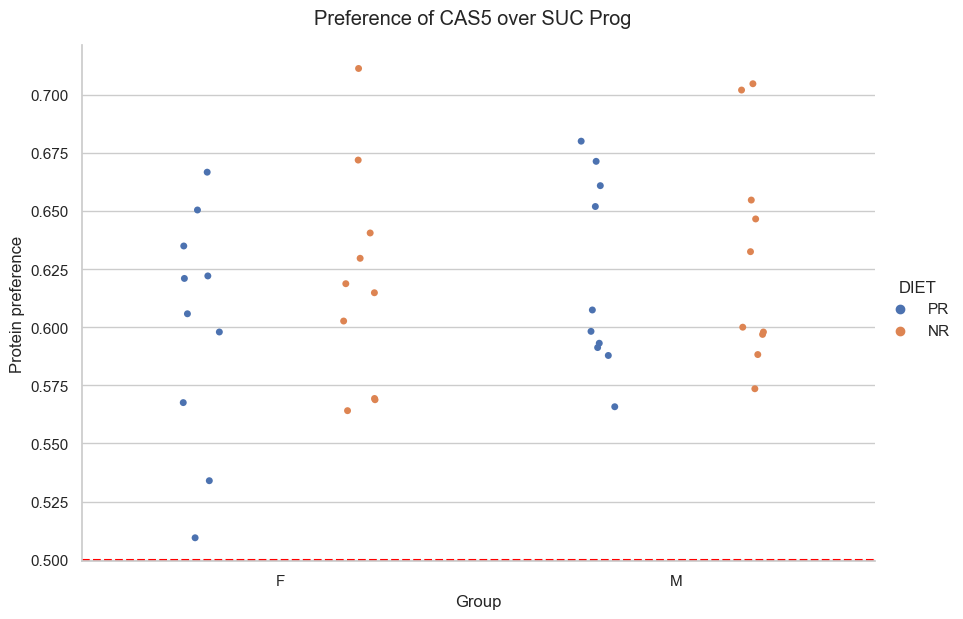

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Plotting scatter plots from the newly created dataframe new_data
sns.set(style="whitegrid")

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col]

# Modify the legend and colors
legend_labels = ['DIET PR', 'DIET NR']
colors = ['deepskyblue', 'grey']

for ratio_column in ratio_columns:
    plt.figure(figsize=(10, 6))
    g = sns.catplot(
        data=new_data, x='SEX', y=ratio_column, hue='DIET',
        kind='strip', dodge=True, height=6, aspect=1.5, palette=colors
    )
    for ax in g.axes.flat:
        ax.axhline(0.5, ls='--', color='red')  # Reference line at y=0.5
    g.fig.suptitle(f'Preference of {ratio_column}', y=1.03)
    g.set_axis_labels('Sex', ratio_column)
    # g.add_legend(title='Diet', labels=legend_labels)
    g.set_axis_labels('Group', 'Protein preference')
    plt.show()

for ratio_column in ratio_columns:
    plt.figure(figsize=(10, 6))
    g = sns.catplot(
        data=new_data, x='SEX', y=ratio_column, hue='DIET',
        kind='strip', dodge=True, height=6, aspect=1.5
    )
    for ax in g.axes.flat:
        ax.axhline(0.5, ls='--', color='red')  # Reference line at y=0.5
    g.fig.suptitle(f'Preference of {ratio_column}', y=1.03)
    g.set_axis_labels('Sex', ratio_column)
 
    g.set_axis_labels('Group', 'Protein preference')
    plt.show()


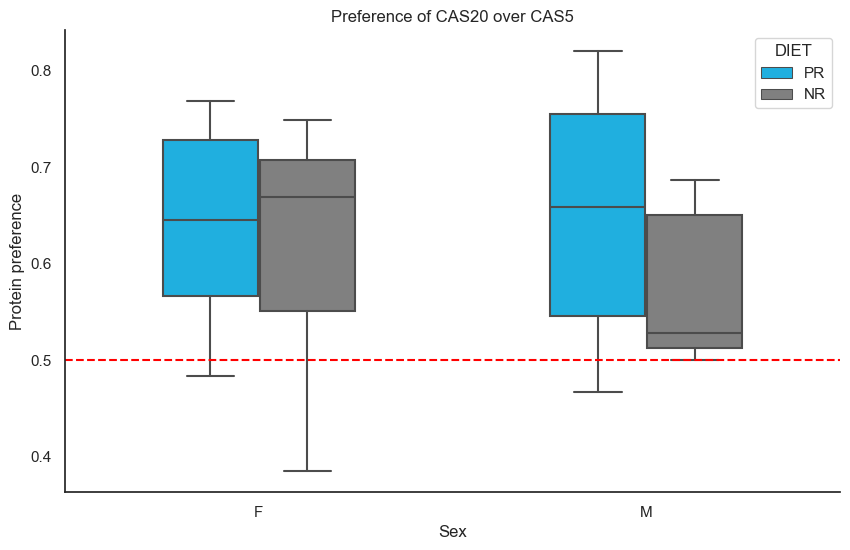

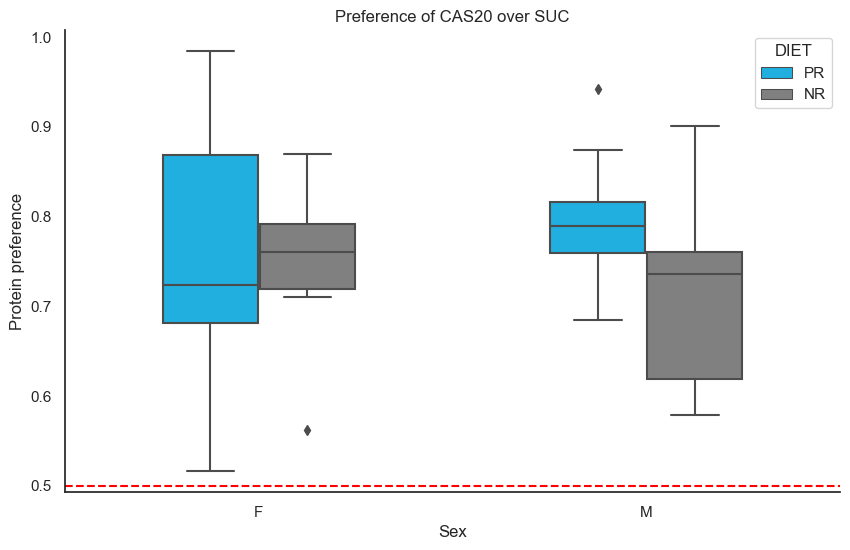

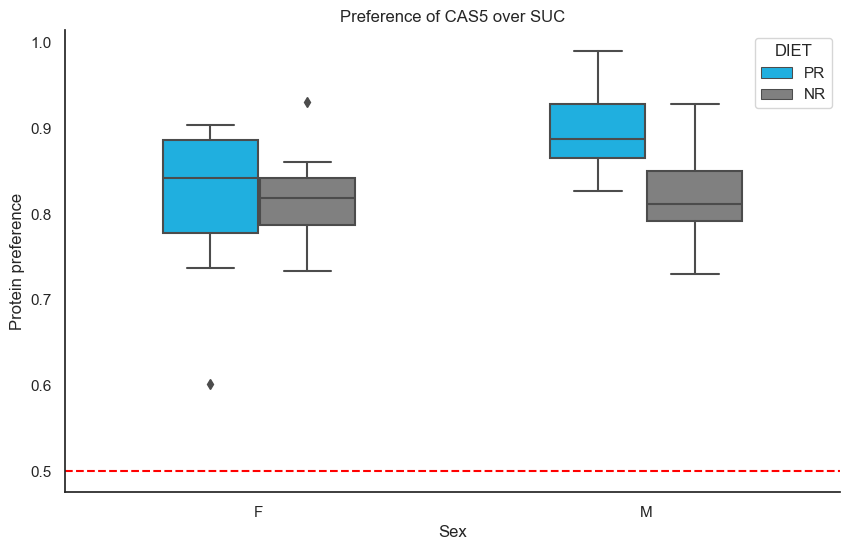

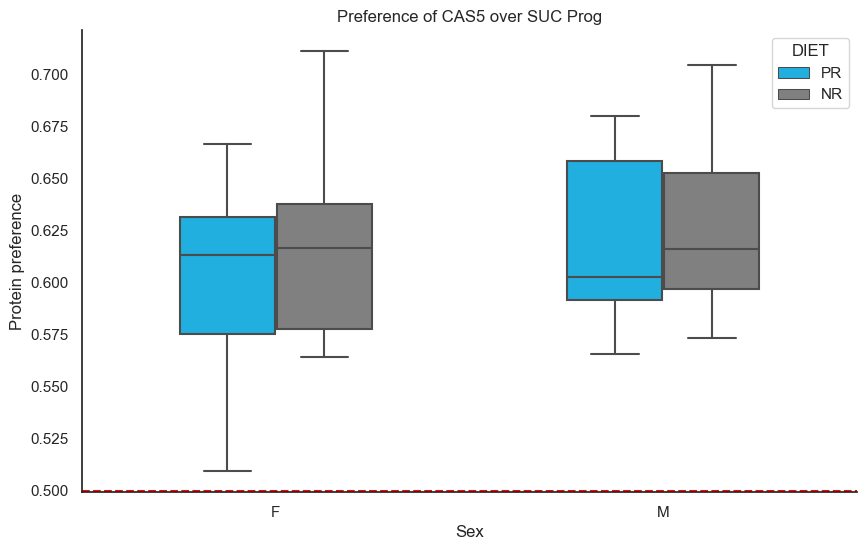

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Plotting box plots from the newly created dataframe new_data
sns.set(style="white")

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col]

# Modify the legend and colors
legend_labels = ['DIET PR', 'DIET NR']
colors = ['deepskyblue', 'grey']

for ratio_column in ratio_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(
        data=new_data, x='SEX', y=ratio_column, hue='DIET',
        palette=colors, width=0.5  # Making the boxplots narrower
    )
    plt.axhline(0.5, ls='--', color='red')  # Reference line at y=0.5
    plt.title(f'Preference of {ratio_column}')
    plt.xlabel('Sex')
    plt.ylabel('Protein preference')  # Replace y-axis label with "Protein preference"
    
    # Remove the background grid lines
    ax.grid(False)
    
    # Remove top and right spines
    sns.despine()
    
    plt.show()


In [ ]:
 ax.plot([(0,1), (np.median(data), np.median(data))], color="k", alpha=0.8)

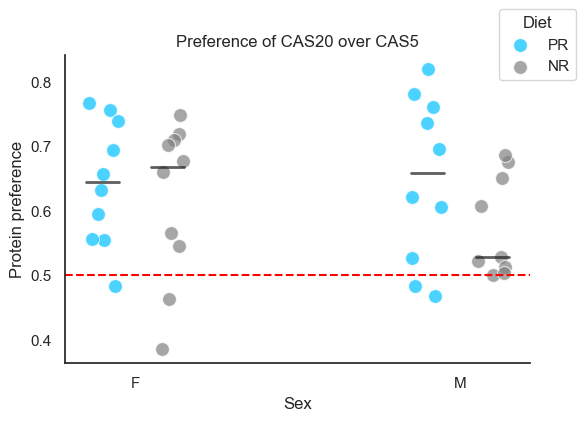

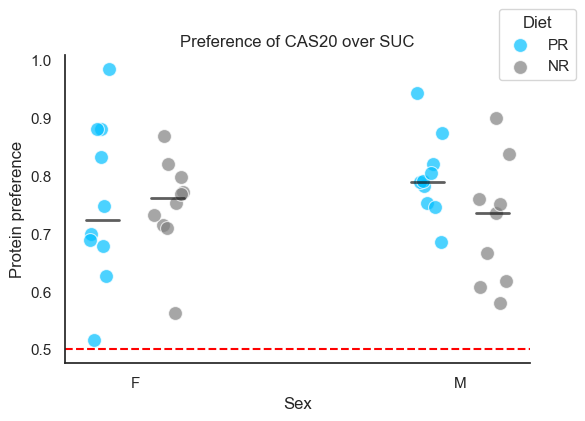

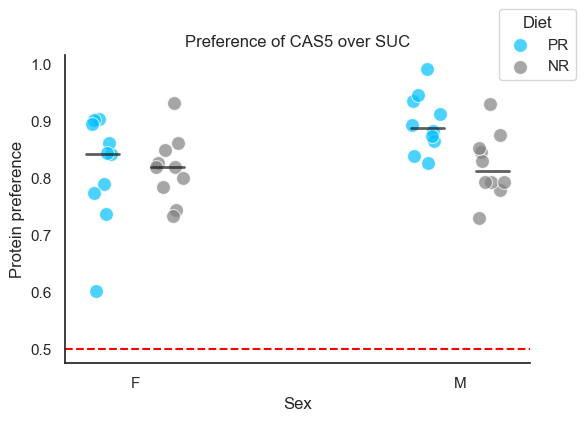

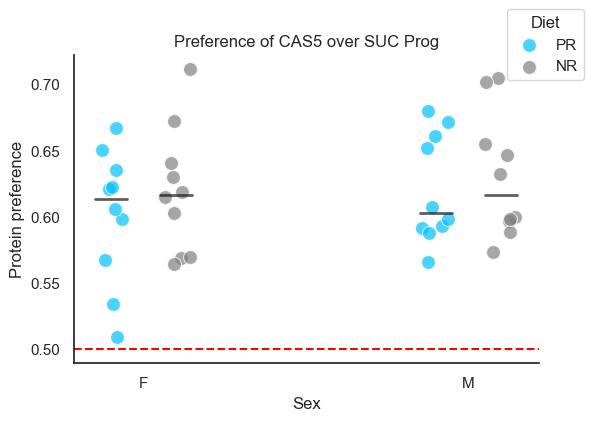

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Plotting scatter plots from the newly created dataframe new_data
sns.set(style="white")

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col]

# Modify the legend and colors
colors = {'PR': 'deepskyblue', 'NR': 'grey'}

# Define offsets for the points to avoid overlap
offset = {'PR': -0.1, 'NR': 0.1}
diets = new_data['DIET'].unique()

# Mapping for SEX categories to numeric values
sex_mapping = {'F': 0, 'M': 1}

for ratio_column in ratio_columns:
    plt.figure(figsize=(6, 4))  # Adjusted size to be smaller
    
    # Scatter plot with adjusted positions
    for diet in diets:
        subset = new_data[new_data['DIET'] == diet]
        jitter = np.random.uniform(-0.05, 0.05, size=len(subset))  # Adding jitter for better dispersion
        sns.scatterplot(
            x=[sex_mapping[x] + offset[diet] + jitter[i] for i, x in enumerate(subset['SEX'])], 
            y=subset[ratio_column],
            label=f'{diet}', s=100, alpha=0.7, color=colors[diet]
        )
    
    plt.axhline(0.5, ls='--', color='red')  # Reference line at y=0.5
    plt.title(f'Preference of {ratio_column}')
    plt.xticks([0, 1], ['F', 'M'])  # Set x-axis labels
    plt.xlabel('Sex')
    plt.ylabel('Protein preference')  # Replace y-axis label with "Protein preference"
    
    # Calculate and plot median lines
    medians = new_data.groupby(['SEX', 'DIET'])[ratio_column].median().reset_index()
    for sex in medians['SEX'].unique():
        for diet in medians['DIET'].unique():
            median_value = medians[(medians['SEX'] == sex) & (medians['DIET'] == diet)][ratio_column].values[0]
            plt.plot([sex_mapping[sex] + offset[diet] - 0.05, sex_mapping[sex] + offset[diet] + 0.05],
                     [median_value, median_value], color='k', linewidth=2, alpha= 0.7)
    
    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_labels = {'PR': 'PR', 'NR': 'NR'}
    updated_handles = [handles[labels.index('PR')], handles[labels.index('NR')]]
    updated_labels = [legend_labels[label] for label in ['PR', 'NR']]
    
    plt.legend(updated_handles, updated_labels, title='Diet', loc='upper right', frameon=True, borderaxespad=-3)
    
    # Remove the background grid lines
    plt.grid(False)
    
    # Remove top and right spines
    sns.despine()
    
    plt.show()


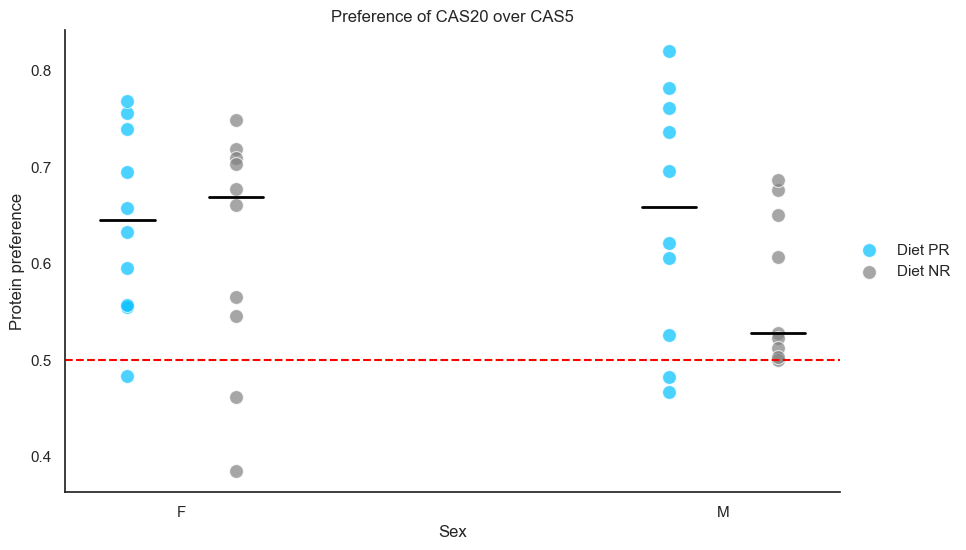

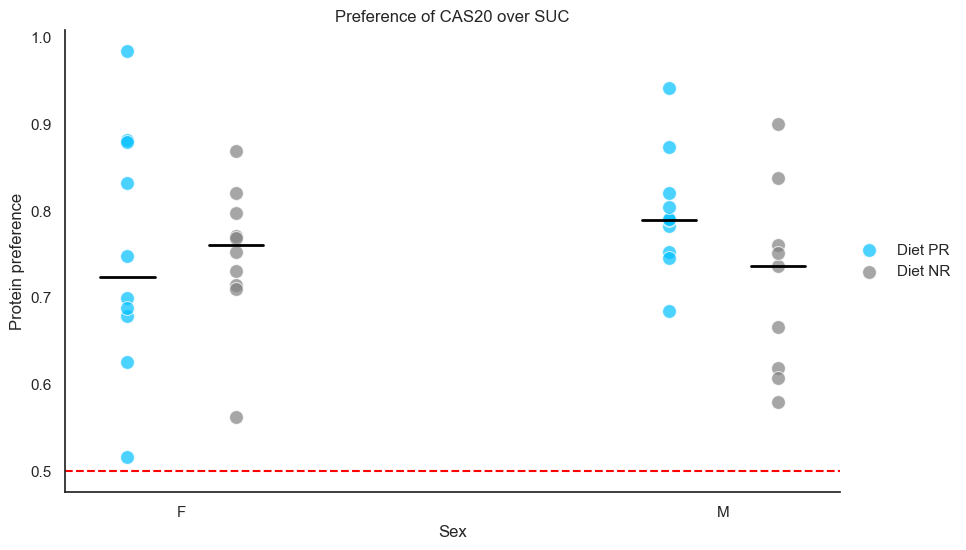

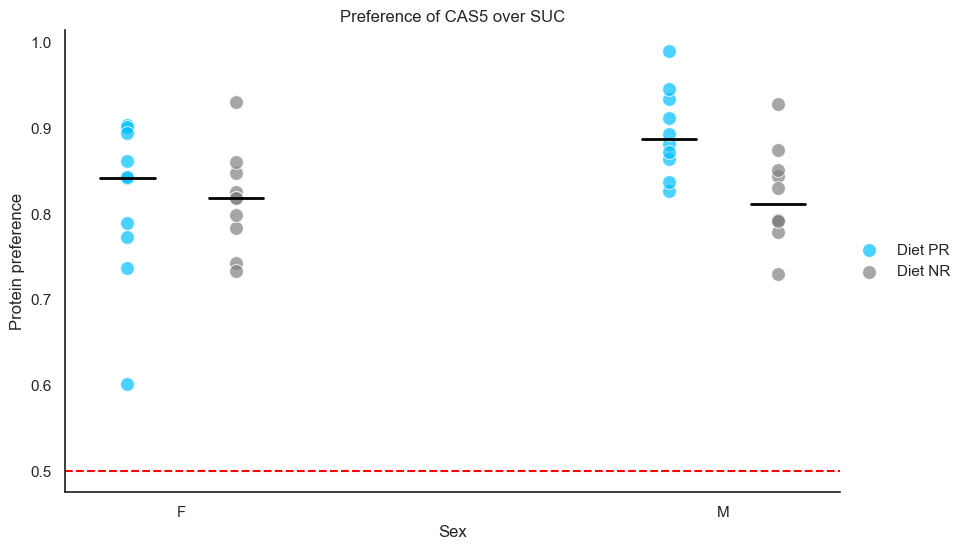

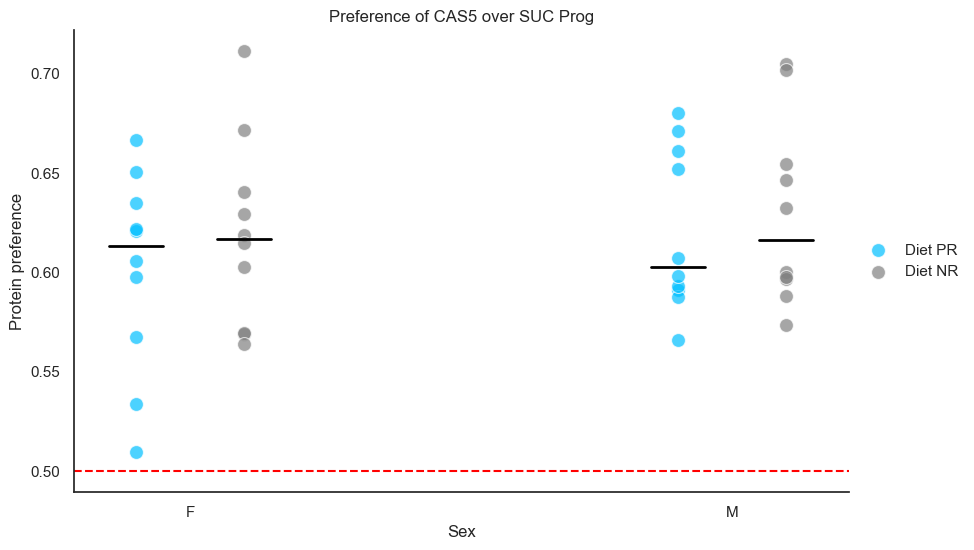

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Plotting scatter plots from the newly created dataframe new_data
sns.set(style="white")

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col]

# Modify the legend and colors
legend_labels = ['DIET PR', 'DIET NR']
colors = {'PR': 'deepskyblue', 'NR': 'grey'}

# Define offsets for the points to avoid overlap
offset = {'PR': -0.1, 'NR': 0.1}
diets = new_data['DIET'].unique()

# Mapping for SEX categories to numeric values
sex_mapping = {'F': 0, 'M': 1}

for ratio_column in ratio_columns:
    plt.figure(figsize=(10, 6))
    
    # Scatter plot with adjusted positions
    for diet in diets:
        subset = new_data[new_data['DIET'] == diet]
        sns.scatterplot(
            x=[sex_mapping[x] + offset[diet] for x in subset['SEX']], 
            y=subset[ratio_column],
            label=f'Diet {diet}', s=100, alpha=0.7, color=colors[diet]
        )
    
    plt.axhline(0.5, ls='--', color='red')  # Reference line at y=0.5
    plt.title(f'Preference of {ratio_column}')
    plt.xticks([0, 1], ['F', 'M'])  # Set x-axis labels
    plt.xlabel('Sex')
    plt.ylabel('Protein preference')  # Replace y-axis label with "Protein preference"
    
    # Calculate and plot median lines
    medians = new_data.groupby(['SEX', 'DIET'])[ratio_column].median().reset_index()
    for sex in medians['SEX'].unique():
        for diet in medians['DIET'].unique():
            median_value = medians[(medians['SEX'] == sex) & (medians['DIET'] == diet)][ratio_column].values[0]
            plt.plot([sex_mapping[sex] + offset[diet] - 0.05, sex_mapping[sex] + offset[diet] + 0.05],
                     [median_value, median_value], color='black', linewidth=2)
    
    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    plt.legend(unique_labels.values(), unique_labels.keys(), loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    
    # Remove the background grid lines
    plt.grid(False)
    
    # Remove top and right spines
    sns.despine()
    
    plt.show()


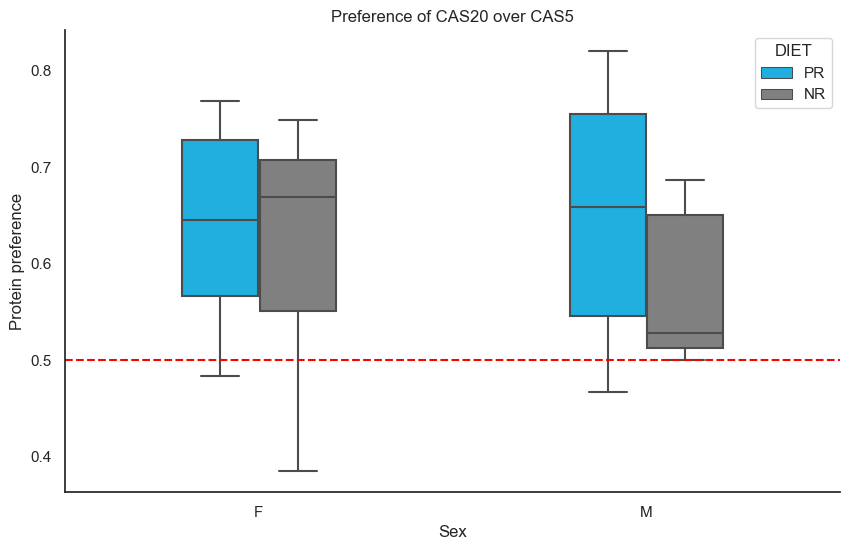

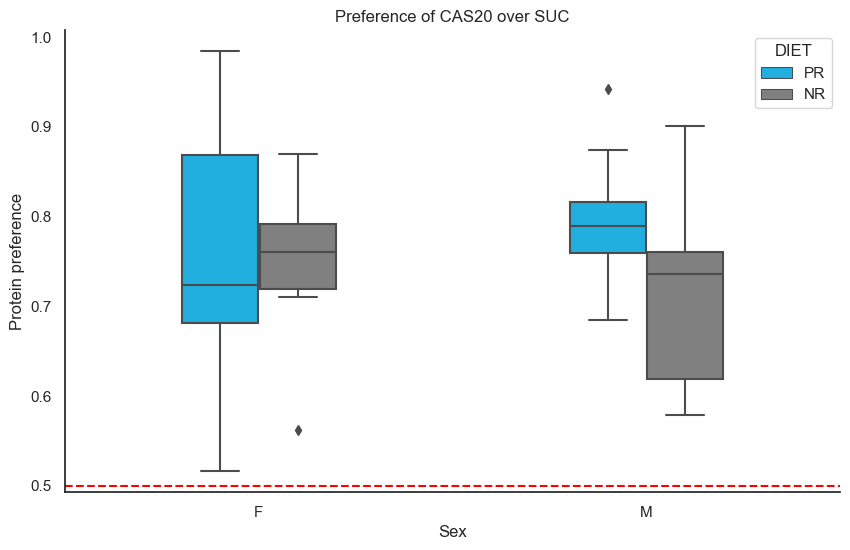

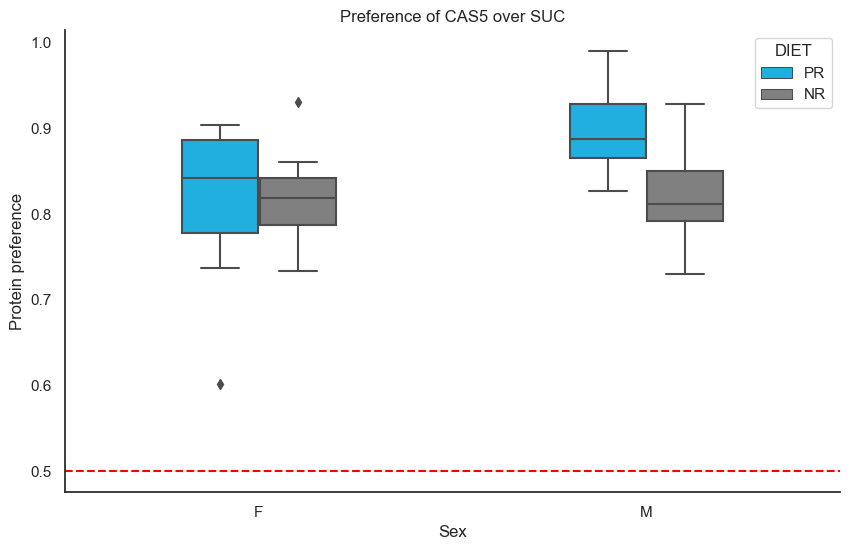

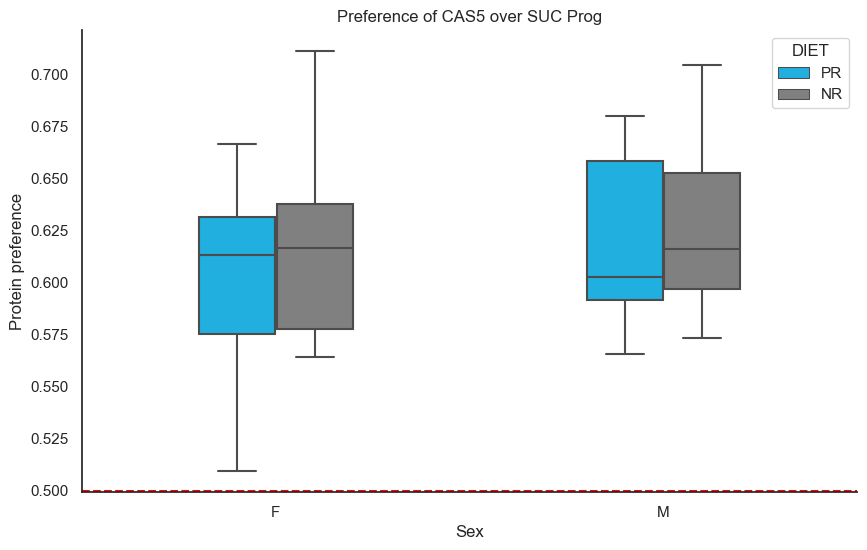

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Replace inf values with NaN (if applicable)
new_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col]

# Modify the legend and colors
colors = ['deepskyblue', 'grey']

# Create a small utility function to offset positions
def adjust_positions(ax, positions):
    for i, artist in enumerate(ax.artists):
        artist.set_x(artist.get_x() + positions[i % len(positions)])

for ratio_column in ratio_columns:
    plt.figure(figsize=(10, 6))
    
    # Create the initial boxplot
    ax = sns.boxplot(
        data=new_data, x='SEX', y=ratio_column, hue='DIET',
        palette=colors, width=0.4  # Making the boxplots narrower
    )
    
    # Adjust positions to create a gap
    adjust_positions(ax, [-0.2, 0.2, -0.2, 0.2])
    
    plt.axhline(0.5, ls='--', color='red')  # Reference line at y=0.5
    plt.title(f'Preference of {ratio_column}')
    plt.xlabel('Sex')
    plt.ylabel('Protein preference')  # Replace y-axis label with "Protein preference"
    
    # Remove the background grid lines
    ax.grid(False)
    
    # Remove top and right spines
    sns.despine()
    
    plt.show()


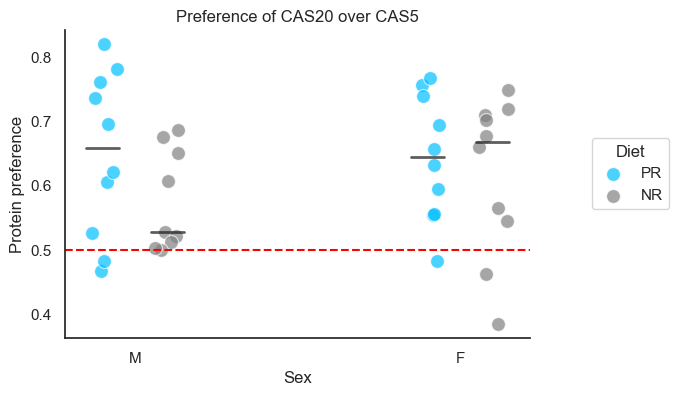

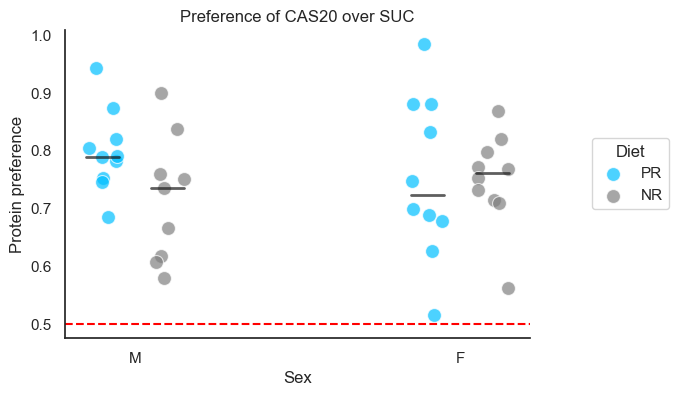

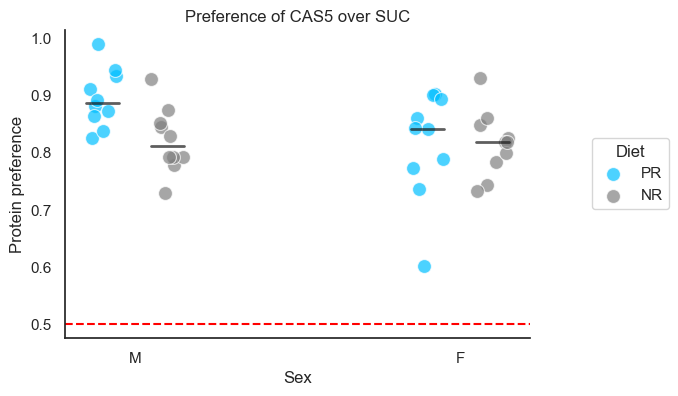

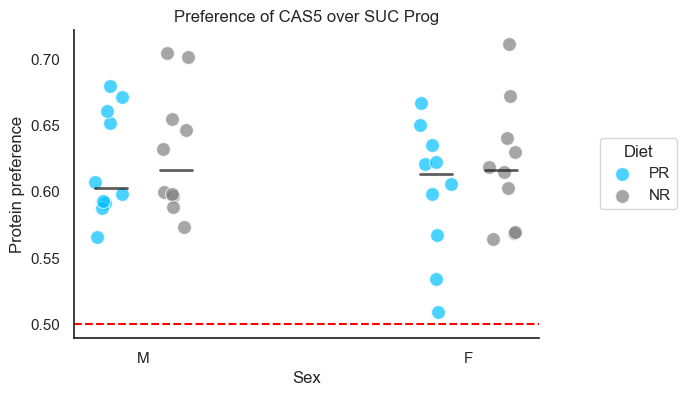

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Plotting scatter plots from the newly created dataframe new_data
sns.set(style="white")

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col]

# Modify the legend and colors
colors = {'PR': 'deepskyblue', 'NR': 'grey'}

# Define offsets for the points to avoid overlap
offset = {'PR': -0.1, 'NR': 0.1}
diets = new_data['DIET'].unique()

# Mapping for SEX categories to numeric values
sex_mapping = {'M': 0, 'F': 1}

for ratio_column in ratio_columns:
    plt.figure(figsize=(6, 4))  # Adjusted size to be smaller
    
    # Scatter plot with adjusted positions
    for diet in diets:
        subset = new_data[new_data['DIET'] == diet]
        jitter = np.random.uniform(-0.05, 0.05, size=len(subset))  # Adding jitter for better dispersion
        sns.scatterplot(
            x=[sex_mapping[x] + offset[diet] + jitter[i] for i, x in enumerate(subset['SEX'])], 
            y=subset[ratio_column],
            label=f'{diet}', s=100, alpha=0.7, color=colors[diet]
        )
    
    plt.axhline(0.5, ls='--', color='red')  # Reference line at y=0.5
    plt.title(f'Preference of {ratio_column}')
    plt.xticks([0, 1], ['M', 'F'])  # Set x-axis labels
    plt.xlabel('Sex')
    plt.ylabel('Protein preference')  # Replace y-axis label with "Protein preference"
    
    # Calculate and plot median lines
    medians = new_data.groupby(['SEX', 'DIET'])[ratio_column].median().reset_index()
    for sex in medians['SEX'].unique():
        for diet in medians['DIET'].unique():
            median_value = medians[(medians['SEX'] == sex) & (medians['DIET'] == diet)][ratio_column].values[0]
            plt.plot([sex_mapping[sex] + offset[diet] - 0.05, sex_mapping[sex] + offset[diet] + 0.05],
                     [median_value, median_value], color='k', linewidth=2, alpha= 0.7)
    
    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_labels = {'PR': 'PR', 'NR': 'NR'}
    updated_handles = [handles[labels.index('PR')], handles[labels.index('NR')]]
    updated_labels = [legend_labels[label] for label in ['PR', 'NR']]
    
    plt.legend(updated_handles, updated_labels, title='Diet', loc='upper right', frameon=True, borderaxespad=-3,bbox_to_anchor=(1.2, 0.5))
    
    # Remove the background grid lines
    plt.grid(False)
    
    # Remove top and right spines
    sns.despine()
    
    plt.show()


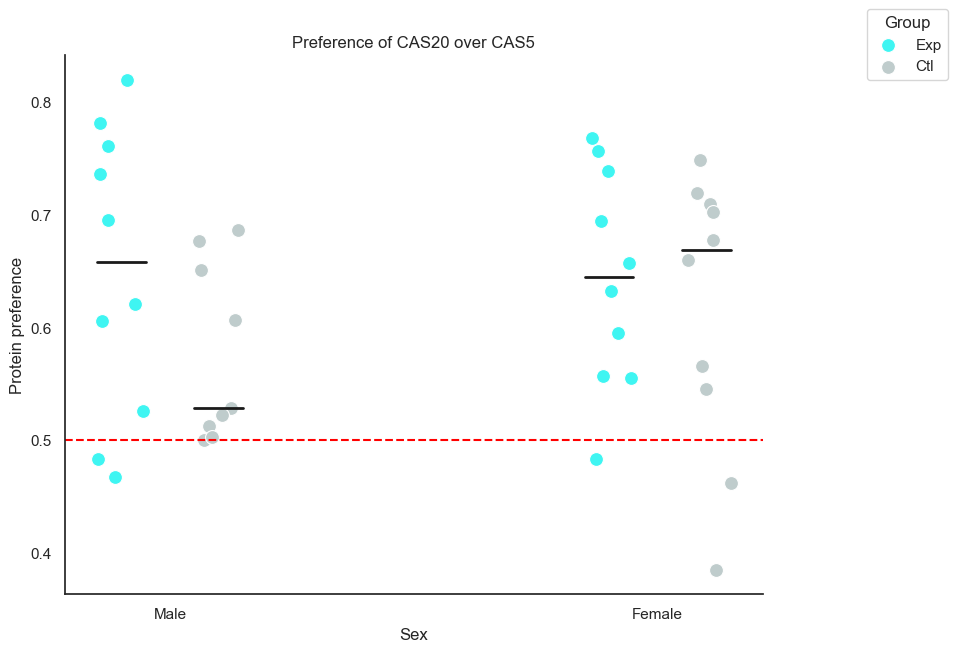

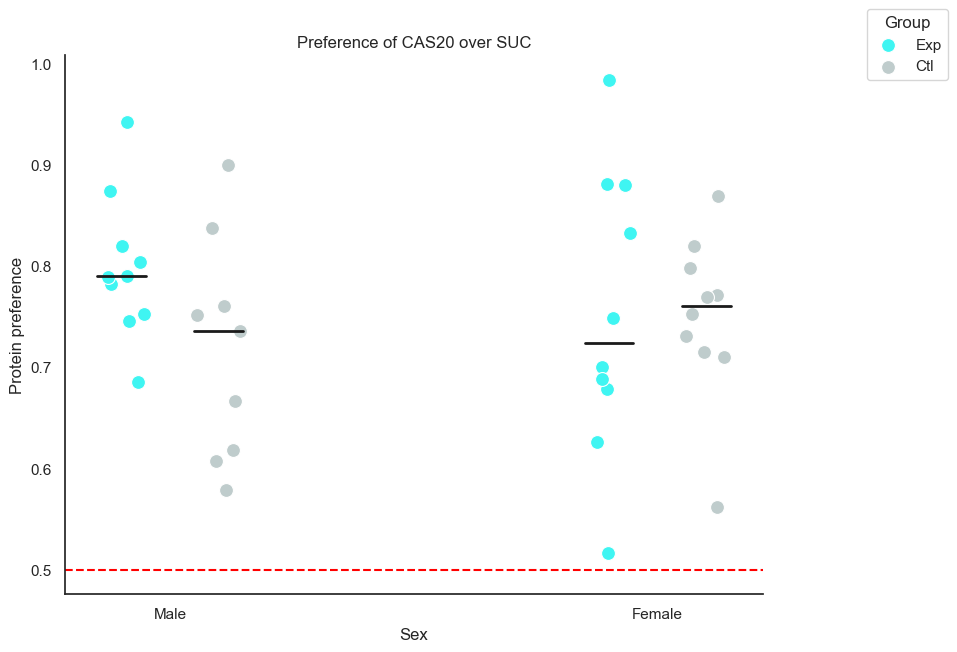

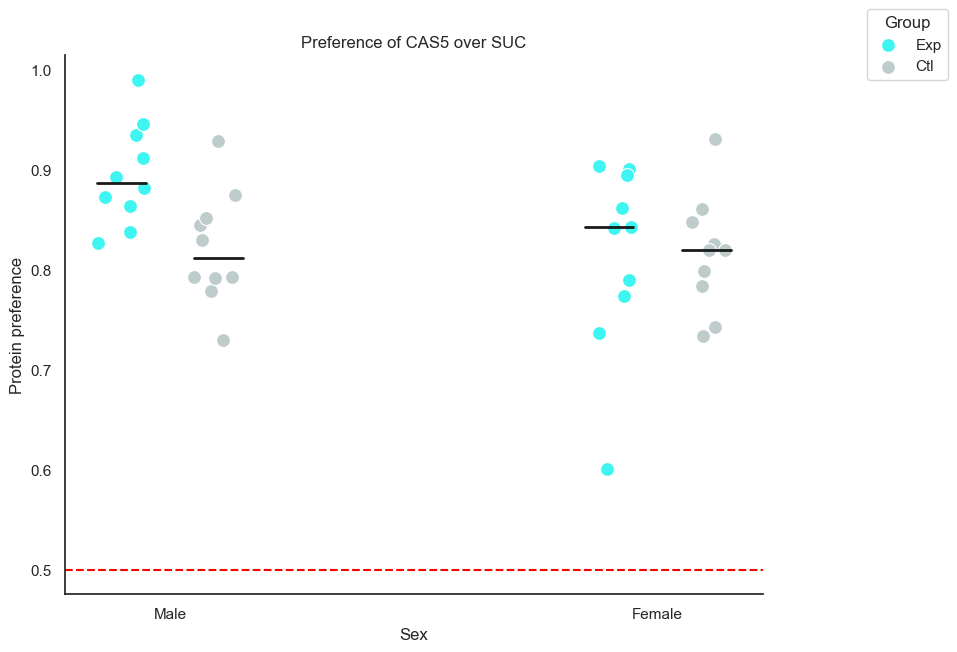

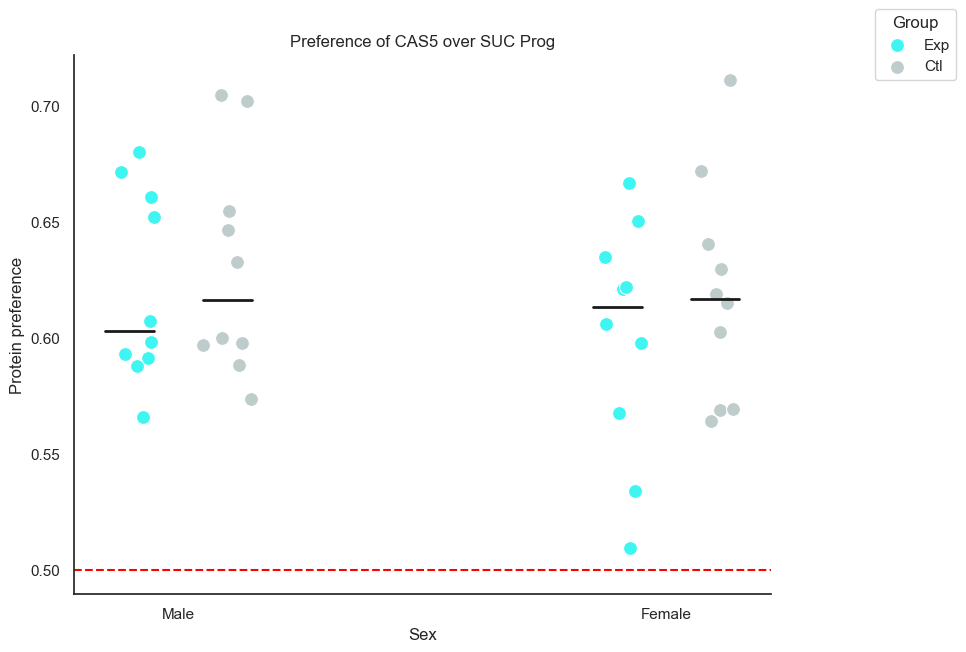

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Plotting scatter plots from the newly created dataframe new_data
sns.set(style="white")

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col]

# Modify the legend and colors
colors = {'PR': (0.247, 0.961, 0.949), 'NR': (0.749, 0.8, 0.8)}

# Define offsets for the points to avoid overlap
offset = {'PR': -0.1, 'NR': 0.1}
diets = new_data['DIET'].unique()

# Mapping for SEX categories to numeric values
sex_mapping = {'M': 0, 'F': 1}

for ratio_column in ratio_columns:
    plt.figure(figsize=(9, 7))  # Adjusted size to be smaller
    
    # Scatter plot with adjusted positions
    for diet in diets:
        subset = new_data[new_data['DIET'] == diet]
        jitter = np.random.uniform(-0.05, 0.05, size=len(subset))  # Adding jitter for better dispersion
        sns.scatterplot(
            x=[sex_mapping[x] + offset[diet] + jitter[i] for i, x in enumerate(subset['SEX'])], 
            y=subset[ratio_column],
            label=f'{diet}', s=100, alpha=1, color=colors[diet]
        )
    
    plt.axhline(0.5, ls='--', color='red')  # Reference line at y=0.5
    plt.title(f'Preference of {ratio_column}')
    plt.xticks([0, 1], ['Male', 'Female'])  # Set x-axis labels
    plt.xlabel('Sex')
    plt.ylabel('Protein preference')  # Replace y-axis label with "Protein preference"
    
    # Calculate and plot median lines
    medians = new_data.groupby(['SEX', 'DIET'])[ratio_column].median().reset_index()
    for sex in medians['SEX'].unique():
        for diet in medians['DIET'].unique():
            median_value = medians[(medians['SEX'] == sex) & (medians['DIET'] == diet)][ratio_column].values[0]
            plt.plot([sex_mapping[sex] + offset[diet] - 0.05, sex_mapping[sex] + offset[diet] + 0.05],
                     [median_value, median_value], color='k', linewidth=2, alpha=1)  
    
    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_labels = {'PR': 'Exp', 'NR': 'Ctl'}
    updated_handles = [handles[labels.index('PR')], handles[labels.index('NR')]]
    updated_labels = [legend_labels[label] for label in ['PR', 'NR']]
    
    plt.legend(updated_handles, updated_labels, title='Group', loc='upper right', frameon=True, borderaxespad=-3, bbox_to_anchor=(1.2, 1) ) 
    
    # Remove the background grid lines
    plt.grid(False)
    
    # Remove top and right spines
    sns.despine()
    #save the plot
    #plt.savefig(f'../plots/Preference_of_{ratio_column}.pdf')
    plt.show()


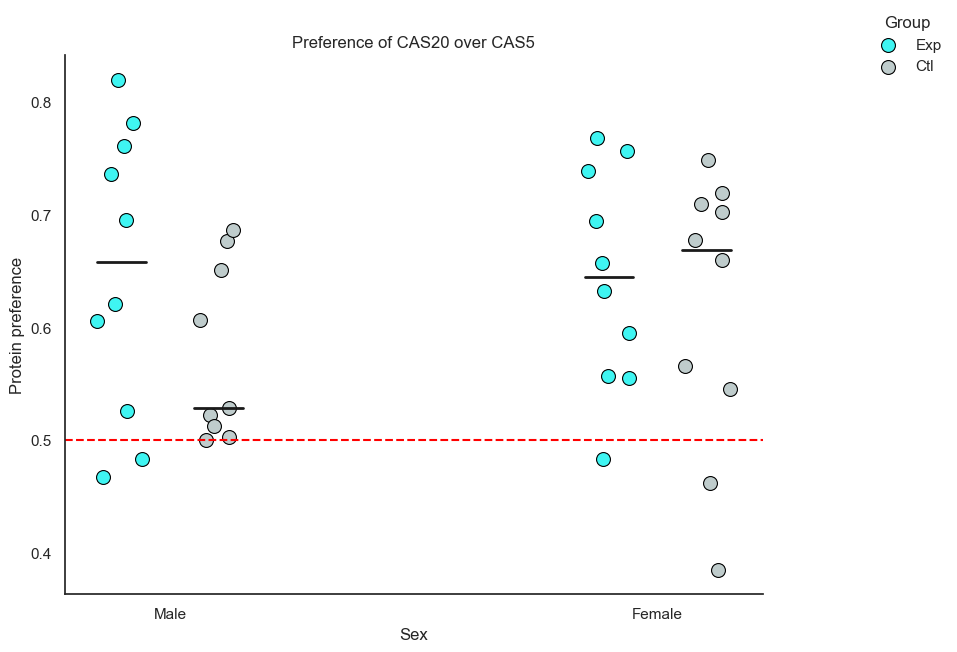

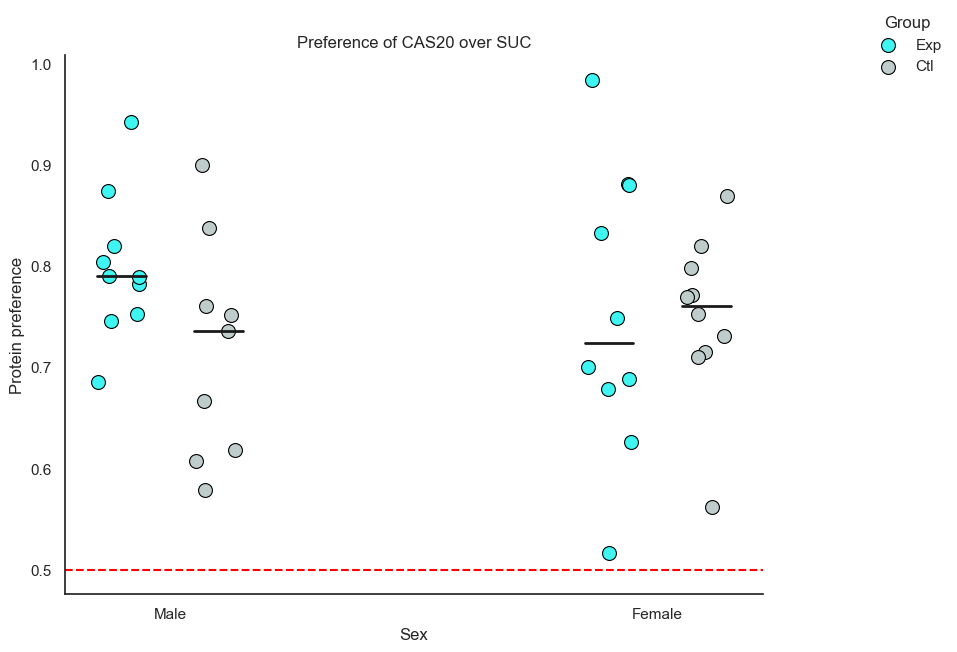

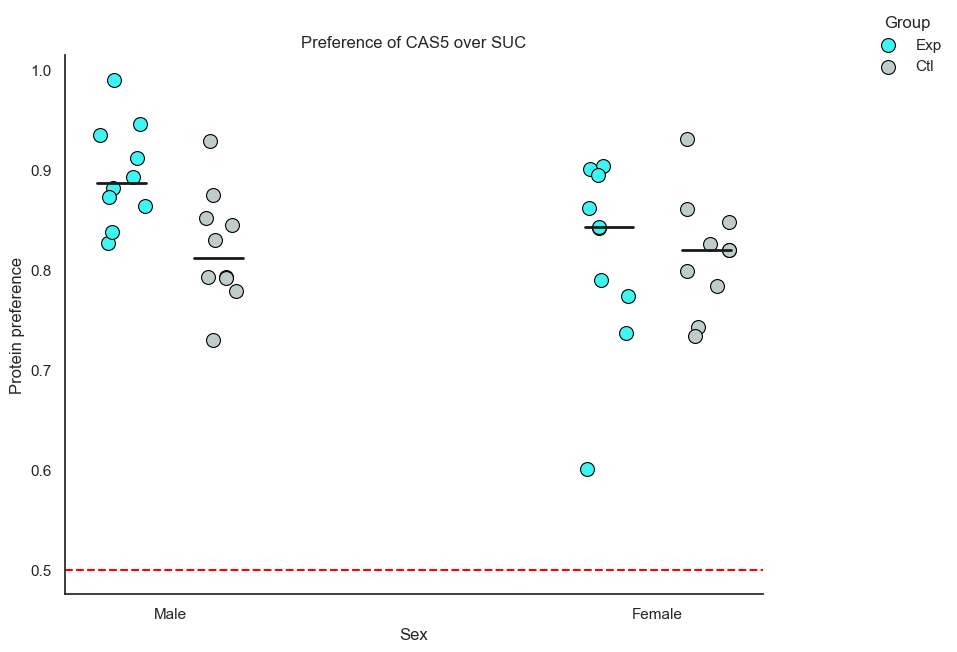

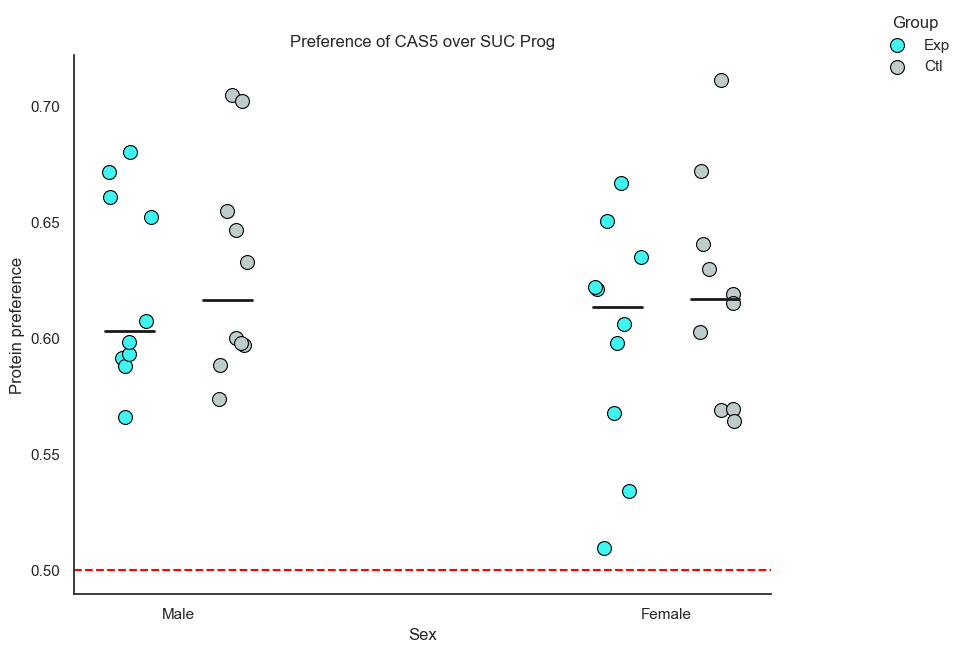

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Plotting scatter plots from the newly created dataframe new_data
sns.set(style="white")

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col]

# Modify the legend and colors
colors = {'PR': (0.247, 0.961, 0.949), 'NR': (0.749, 0.8, 0.8)}

# Define offsets for the points to avoid overlap
offset = {'PR': -0.1, 'NR': 0.1}
diets = new_data['DIET'].unique()

# Mapping for SEX categories to numeric values
sex_mapping = {'M': 0, 'F': 1}

for ratio_column in ratio_columns:
    plt.figure(figsize=(9, 7))  # Adjusted size to be smaller
    
    # Scatter plot with adjusted positions
    for diet in diets:
        subset = new_data[new_data['DIET'] == diet]
        jitter = np.random.uniform(-0.05, 0.05, size=len(subset))  # Adding jitter for better dispersion
        sns.scatterplot(
            x=[sex_mapping[x] + offset[diet] + jitter[i] for i, x in enumerate(subset['SEX'])], 
            y=subset[ratio_column],
            label=f'{diet}', s=100, alpha=1, color=colors[diet], edgecolor='black'
        )
    
    plt.axhline(0.5, ls='--', color='red')  # Reference line at y=0.5
    plt.title(f'Preference of {ratio_column}')
    plt.xticks([0, 1], ['Male', 'Female'])  # Set x-axis labels
    plt.xlabel('Sex')
    plt.ylabel('Protein preference')  # Replace y-axis label with "Protein preference"
    
    # Calculate and plot median lines
    medians = new_data.groupby(['SEX', 'DIET'])[ratio_column].median().reset_index()
    for sex in medians['SEX'].unique():
        for diet in medians['DIET'].unique():
            median_value = medians[(medians['SEX'] == sex) & (medians['DIET'] == diet)][ratio_column].values[0]
            plt.plot([sex_mapping[sex] + offset[diet] - 0.05, sex_mapping[sex] + offset[diet] + 0.05],
                     [median_value, median_value], color='k', linewidth=2, alpha=1)  
    
    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_labels = {'PR': 'Exp', 'NR': 'Ctl'}
    updated_handles = [handles[labels.index('PR')], handles[labels.index('NR')]]
    updated_labels = [legend_labels[label] for label in ['PR', 'NR']]
    
    plt.legend(updated_handles, updated_labels, title='Group', loc='upper right', frameon=False, borderaxespad=-3, bbox_to_anchor=(1.2, 1)) 
    
    # Remove the background grid lines
    plt.grid(False)
    
    # Remove top and right spines
    sns.despine()
    #save the plot
    #plt.savefig(f'../plots/Preference_of_{ratio_column}.pdf')
    plt.show()


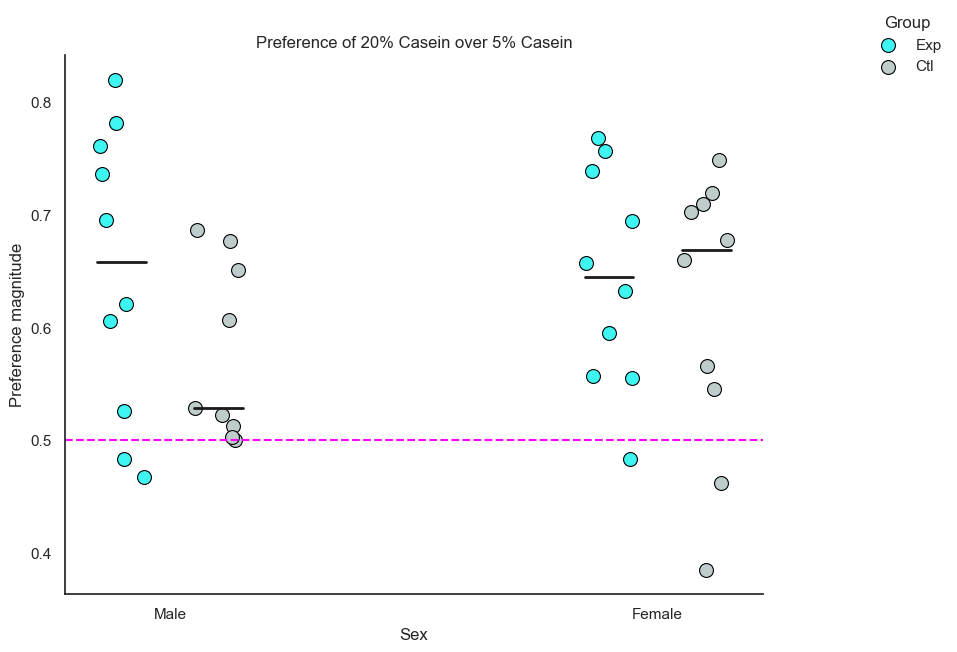

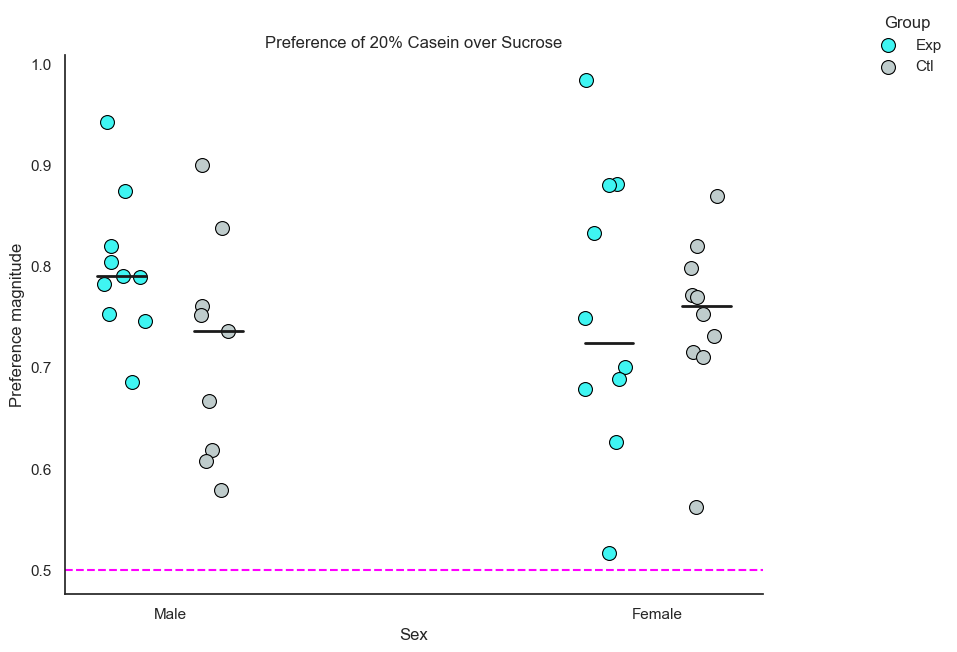

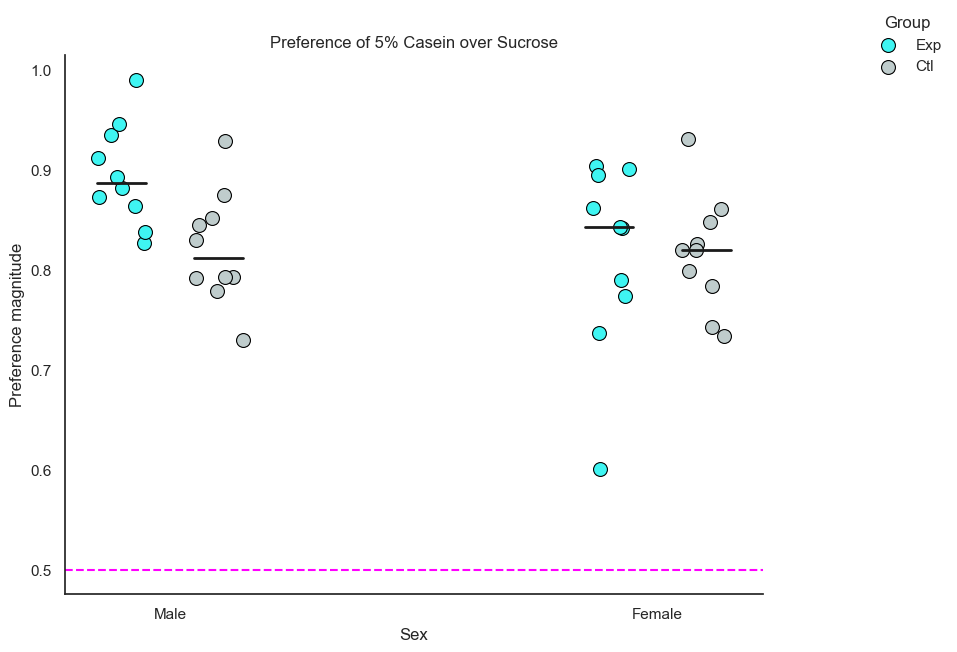

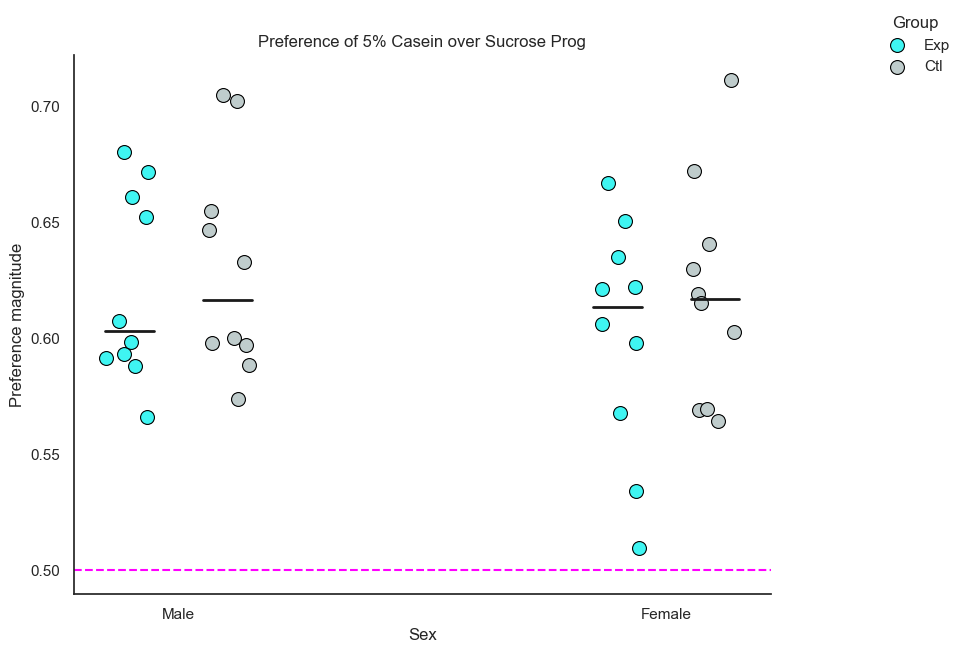

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set Seaborn context to override its default settings
sns.set_context("notebook", rc={
    'font.size': 16,        # Global font size
    'axes.titlesize': 16,   # Font size of the axes title
    'axes.labelsize': 16,   # Font size of the x and y labels
    'xtick.labelsize': 12,  # Font size of the x tick labels
    'ytick.labelsize': 12,  # Font size of the y tick labels
    'legend.fontsize': 16,  # Font size of the legend
    'figure.titlesize': 16  # Font size of the figure title
})

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Plotting scatter plots from the newly created dataframe new_data
sns.set(style="white")

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col or 'SUC' in col]

# Modify the legend and colors
colors = {'PR': (0.247, 0.961, 0.949), 'NR': (0.749, 0.8, 0.8)}

# Define offsets for the points to avoid overlap
offset = {'PR': -0.1, 'NR': 0.1}
diets = new_data['DIET'].unique()

# Mapping for SEX categories to numeric values
sex_mapping = {'M': 0, 'F': 1}

for ratio_column in ratio_columns:
    plt.figure(figsize=(9, 7))  # Adjusted size to be smaller

    # Replace terms in the title
    title = ratio_column.replace('CAS20', '20% Casein').replace('CAS5', '5% Casein').replace('SUC', 'Sucrose')
    
    # Scatter plot with adjusted positions
    for diet in diets:
        subset = new_data[new_data['DIET'] == diet]
        jitter = np.random.uniform(-0.05, 0.05, size=len(subset))  # Adding jitter for better dispersion
        sns.scatterplot(
            x=[sex_mapping[x] + offset[diet] + jitter[i] for i, x in enumerate(subset['SEX'])], 
            y=subset[ratio_column],
            label=f'{diet}', s=100, alpha=1, color=colors[diet], edgecolor='black'
        )
    
    plt.axhline(0.5, ls='--', color='magenta')  # Reference line at y=0.5
    plt.title(f'Preference of {title}')
    plt.xticks([0, 1], ['Male', 'Female'])  # Set x-axis labels
    plt.xlabel('Sex')
    plt.ylabel('Preference magnitude')  # Replace y-axis label with "Protein preference"
    
    # Calculate and plot median lines
    medians = new_data.groupby(['SEX', 'DIET'])[ratio_column].median().reset_index()
    for sex in medians['SEX'].unique():
        for diet in medians['DIET'].unique():
            median_value = medians[(medians['SEX'] == sex) & (medians['DIET'] == diet)][ratio_column].values[0]
            plt.plot([sex_mapping[sex] + offset[diet] - 0.05, sex_mapping[sex] + offset[diet] + 0.05],
                     [median_value, median_value], color='k', linewidth=2, alpha=1)  
    
    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_labels = {'PR': 'Exp', 'NR': 'Ctl'}
    updated_handles = [handles[labels.index('PR')], handles[labels.index('NR')]]
    updated_labels = [legend_labels[label] for label in ['PR', 'NR']]
    
    plt.legend(updated_handles, updated_labels, title='Group', loc='upper right', frameon=False, borderaxespad=-3, bbox_to_anchor=(1.2, 1)) 
    
    # Remove the background grid lines
    plt.grid(False)
    
    # Remove top and right spines
    sns.despine()
    #save the plot
    plt.savefig(f'../plots/FINAL_PLOTS_FOR_FENS24/Preference_of_{title}.pdf', bbox_inches='tight')
    plt.show()



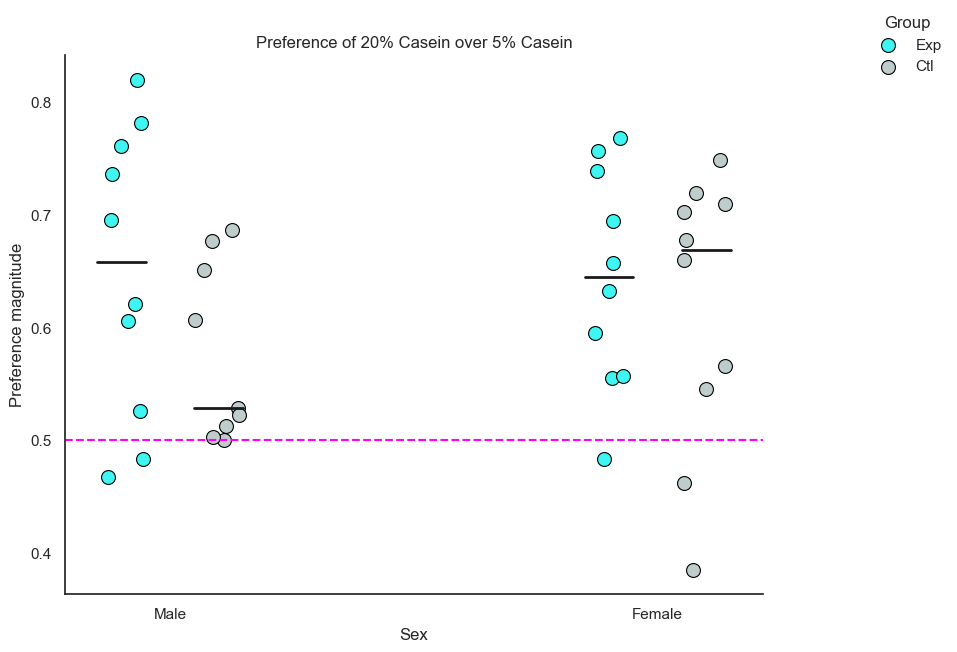

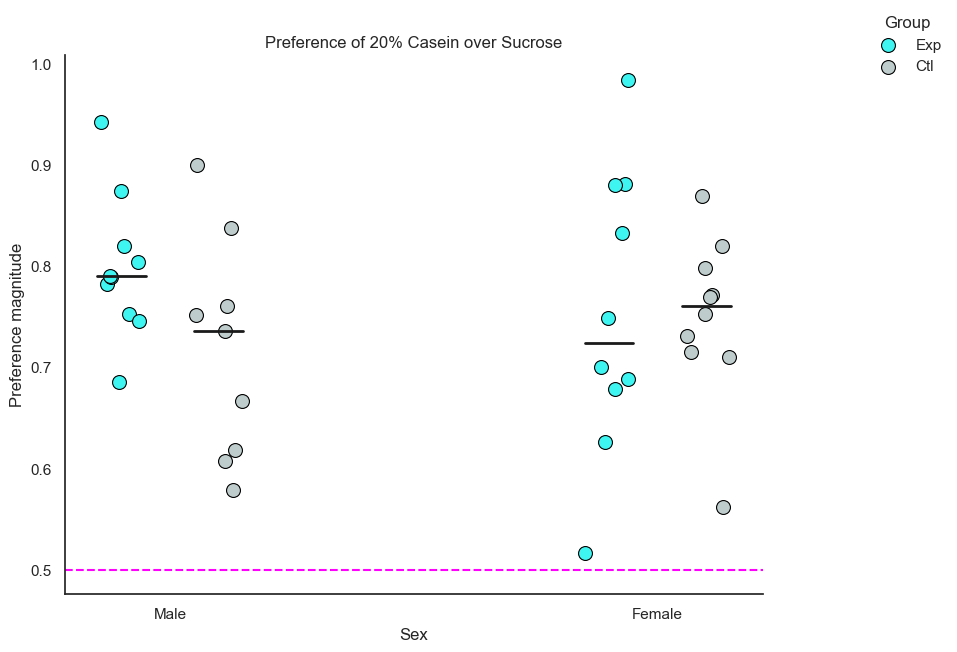

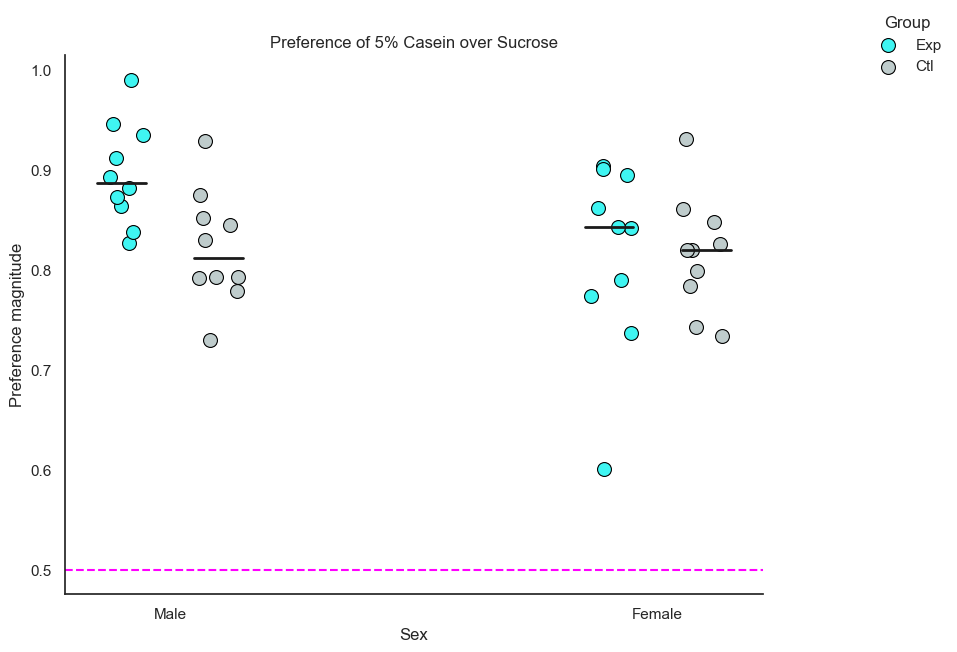

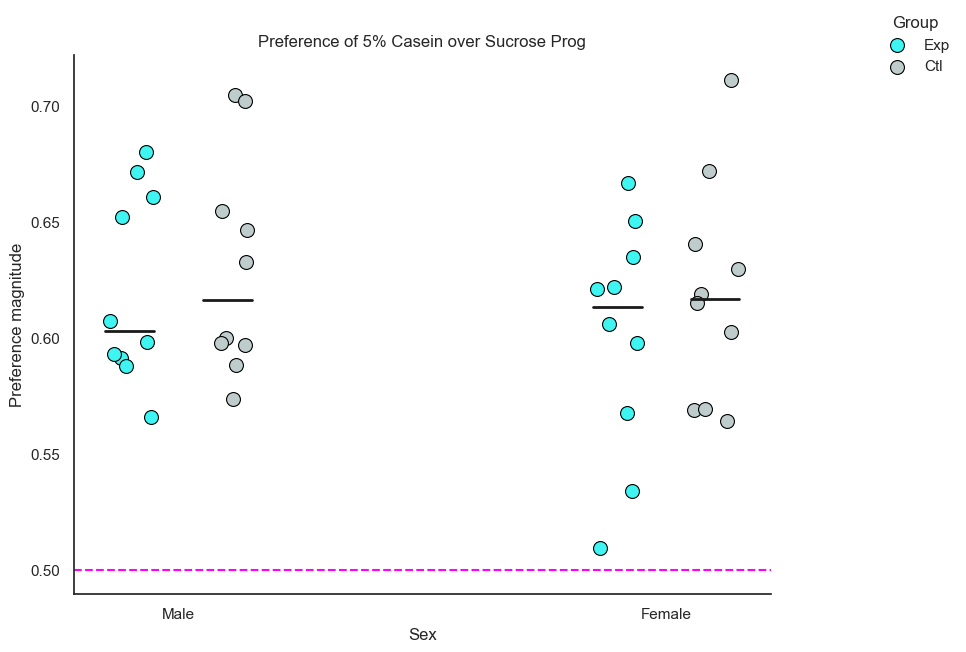

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Update Matplotlib rcParams
plt.rcParams.update({
    'font.size': 16,        # Global font size
    'axes.titlesize': 16,   # Font size of the axes title
    'axes.labelsize': 16,   # Font size of the x and y labels
    'xtick.labelsize': 12,  # Font size of the x tick labels
    'ytick.labelsize': 12,  # Font size of the y tick labels
    'legend.fontsize': 16,  # Font size of the legend
    'figure.titlesize': 16  # Font size of the figure title
})

# Set Seaborn context and style to ensure font sizes are applied
sns.set(style="white", context="notebook", rc={
    'font.size': 16,        # Global font size
    'axes.titlesize': 16,   # Font size of the axes title
    'axes.labelsize': 16,   # Font size of the x and y labels
    'xtick.labelsize': 12,  # Font size of the x tick labels
    'ytick.labelsize': 12,  # Font size of the y tick labels
    'legend.fontsize': 16,  # Font size of the legend
    'figure.titlesize': 16  # Font size of the figure title
})

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)

# Plotting scatter plots from the newly created dataframe new_data
sns.set(style="white")

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col or 'SUC' in col]

# Modify the legend and colors
colors = {'PR': (0.247, 0.961, 0.949), 'NR': (0.749, 0.8, 0.8)}

# Define offsets for the points to avoid overlap
offset = {'PR': -0.1, 'NR': 0.1}
diets = new_data['DIET'].unique()

# Mapping for SEX categories to numeric values
sex_mapping = {'M': 0, 'F': 1}

for ratio_column in ratio_columns:
    plt.figure(figsize=(9, 7))  # Adjusted size to be smaller

    # Replace terms in the title
    title = ratio_column.replace('CAS20', '20% Casein').replace('CAS5', '5% Casein').replace('SUC', 'Sucrose')
    
    # Scatter plot with adjusted positions
    for diet in diets:
        subset = new_data[new_data['DIET'] == diet]
        jitter = np.random.uniform(-0.05, 0.05, size=len(subset))  # Adding jitter for better dispersion
        sns.scatterplot(
            x=[sex_mapping[x] + offset[diet] + jitter[i] for i, x in enumerate(subset['SEX'])], 
            y=subset[ratio_column],
            label=f'{diet}', s=100, alpha=1, color=colors[diet], edgecolor='black'
        )
    
    plt.axhline(0.5, ls='--', color='magenta')  # Reference line at y=0.5
    plt.title(f'Preference of {title}')
    plt.xticks([0, 1], ['Male', 'Female'])  # Set x-axis labels
    plt.xlabel('Sex')
    plt.ylabel('Preference magnitude')  # Replace y-axis label with "Protein preference"
    
    # Calculate and plot median lines
    medians = new_data.groupby(['SEX', 'DIET'])[ratio_column].median().reset_index()
    for sex in medians['SEX'].unique():
        for diet in medians['DIET'].unique():
            median_value = medians[(medians['SEX'] == sex) & (medians['DIET'] == diet)][ratio_column].values[0]
            plt.plot([sex_mapping[sex] + offset[diet] - 0.05, sex_mapping[sex] + offset[diet] + 0.05],
                     [median_value, median_value], color='k', linewidth=2, alpha=1)  
    
    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_labels = {'PR': 'Exp', 'NR': 'Ctl'}
    updated_handles = [handles[labels.index('PR')], handles[labels.index('NR')]]
    updated_labels = [legend_labels[label] for label in ['PR', 'NR']]
    
    plt.legend(updated_handles, updated_labels, title='Group', loc='upper right', frameon=False, borderaxespad=-3, bbox_to_anchor=(1.2, 1)) 
    
    # Remove the background grid lines
    plt.grid(False)
    
    # Remove top and right spines
    sns.despine()
    #save the plot
    plt.savefig(f'../plots/FINAL_PLOTS_FOR_FENS24/Preference_of_{title}.pdf', bbox_inches='tight')
    plt.show()


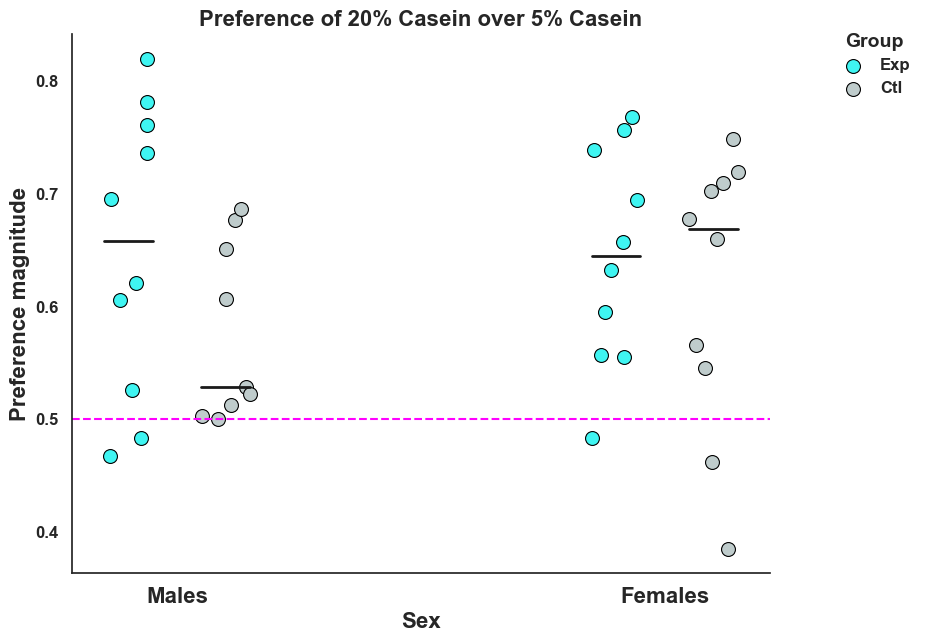

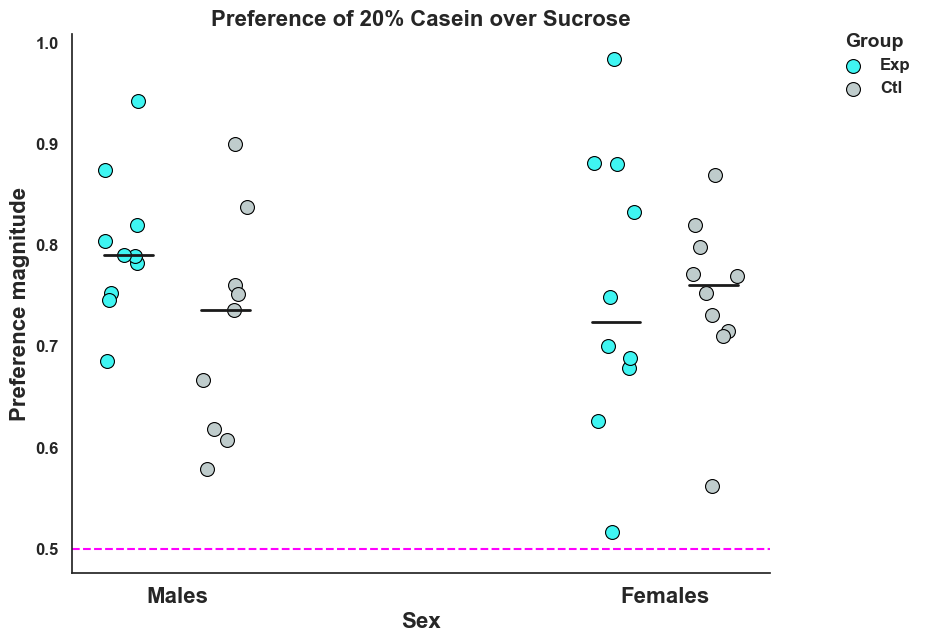

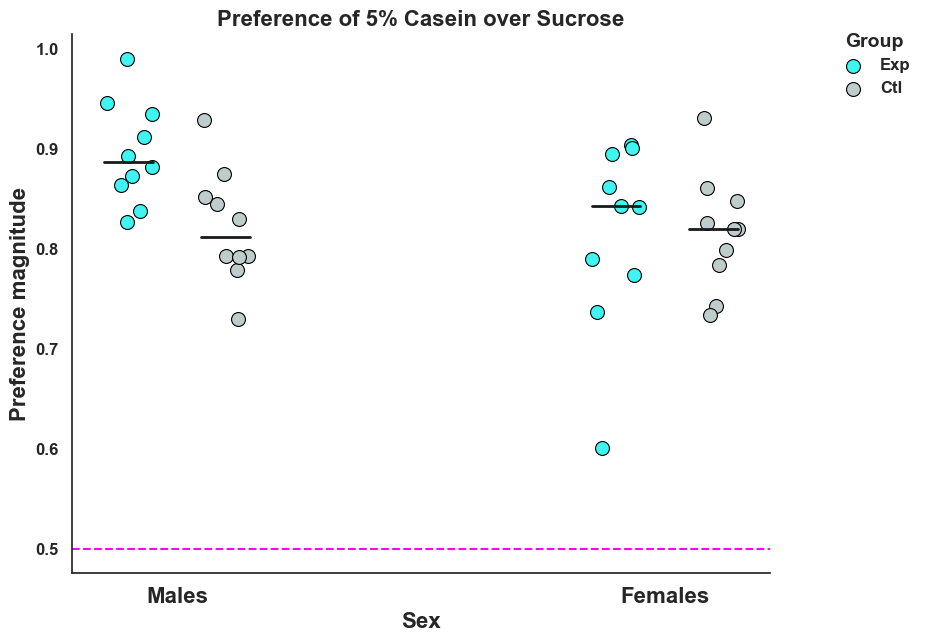

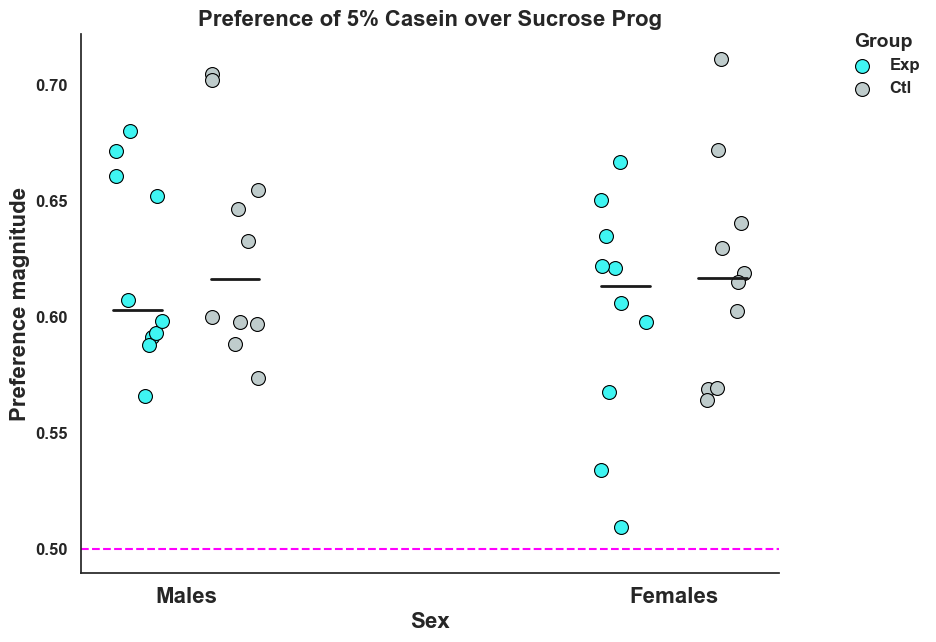

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '../results/CHOICE_RATIOS.csv'
new_data = pd.read_csv(file_path)


plt.rcParams.update({
    'font.size': 16,          # Global font size
    'font.weight': 'bold',    # Global font weight
    'axes.titlesize': 16,     # Font size of the axes title
    'axes.titleweight': 'bold', # Font weight of the axes title
    'axes.labelsize': 16,     # Font size of the x and y labels
    'axes.labelweight': 'bold', # Font weight of the x and y labels
    'xtick.labelsize': 12,    # Font size of the x tick labels
    'ytick.labelsize': 12,    # Font size of the y tick labels
    'legend.fontsize': 14,    # Font size of the legend
    'figure.titlesize': 16,   # Font size of the figure title
    'figure.titleweight': 'bold' # Font weight of the figure title
})

# Plotting scatter plots from the newly created dataframe new_data
sns.set(style="white")

# Extract columns related to choice sessions
ratio_columns = [col for col in new_data.columns if 'CAS' in col or 'SUC' in col]

# Define colors
colors = {'PR': (0.247, 0.961, 0.949), 'NR': (0.749, 0.8, 0.8)}

# Define offsets for the points to avoid overlap
offset = {'PR': -0.1, 'NR': 0.1}
diets = new_data['DIET'].unique()

# Mapping for SEX categories to numeric values
sex_mapping = {'M': 0, 'F': 1}

for ratio_column in ratio_columns:
    plt.figure(figsize=(9, 7))  # Adjusted size to be similar to the bar plots

    # Replace terms in the title
    title = ratio_column.replace('CAS20', '20% Casein').replace('CAS5', '5% Casein').replace('SUC', 'Sucrose')
    
    # Scatter plot with adjusted positions
    for diet in diets:
        subset = new_data[new_data['DIET'] == diet]
        jitter = np.random.uniform(-0.05, 0.05, size=len(subset))  # Adding jitter for better dispersion
        sns.scatterplot(
            x=[sex_mapping[x] + offset[diet] + jitter[i] for i, x in enumerate(subset['SEX'])], 
            y=subset[ratio_column],
            label=f'{diet}', s=100, alpha=1, color=colors[diet], edgecolor='black'
        )
    
    plt.axhline(0.5, ls='--', color='magenta')  # Reference line at y=0.5
    plt.title(f'Preference of {title}', fontsize=16, fontweight='bold')
    plt.xticks([0, 1], ['Males', 'Females'], fontsize=16, fontweight='bold')  # Set x-axis labels
    plt.yticks(fontsize=12, fontweight='bold')  # Set y-axis labels
    plt.xlabel('Sex', fontsize=16, fontweight='bold')
    plt.ylabel('Preference magnitude', fontsize=16, fontweight='bold')  # Replace y-axis label with "Protein preference"
    
    # Calculate and plot median lines
    medians = new_data.groupby(['SEX', 'DIET'])[ratio_column].median().reset_index()
    for sex in medians['SEX'].unique():
        for diet in medians['DIET'].unique():
            median_value = medians[(medians['SEX'] == sex) & (medians['DIET'] == diet)][ratio_column].values[0]
            plt.plot([sex_mapping[sex] + offset[diet] - 0.05, sex_mapping[sex] + offset[diet] + 0.05],
                     [median_value, median_value], color='k', linewidth=2, alpha=1)  
    
    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_labels = {'PR': 'Exp', 'NR': 'Ctl'} 
    updated_handles = [handles[labels.index('PR')], handles[labels.index('NR')]]
    updated_labels = [legend_labels[label] for label in ['PR', 'NR']]
    
    plt.legend(updated_handles, updated_labels, title='Group', loc='upper right', frameon=False, borderaxespad=-0.5, bbox_to_anchor=(1.2, 1)) 
    # Make legend title and legend labels bold
    plt.setp(plt.gca().get_legend().get_title(), fontsize=14, fontweight='bold')
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=12, fontweight='bold')

    # Remove the background grid lines
    plt.grid(False)
    
    # Remove top and right spines
    sns.despine()
    
    # Save the plot
    plt.savefig(f'../plots/FINAL_PLOTS_FOR_FENS24/Preference_of_{title}.pdf', bbox_inches='tight')
    plt.show()
